In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./data/netflix_titles.csv')

# Basic info
df.info()
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(df.columns.tolist())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Rows: 8807, Columns: 12
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
  show_id     type                  title         director  \
0      s1    Movie   Dick 

In [2]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Optionally, display the duplicate rows
if num_duplicates > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Number of duplicate rows: 0


In [3]:
# Count of unique values in 'type' column
type_counts = df['type'].value_counts()

# Display the result
print("📊 Count of each content type:")
print(type_counts)

📊 Count of each content type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [4]:
# Drop missing values in release_year if any
release_years = df['release_year'].dropna()

# 1. Get the minimum and maximum year
min_year = release_years.min()
max_year = release_years.max()

# 2. Calculate the range (difference)
year_range = max_year - min_year

# 3. Count how many unique years are within this range
unique_years = release_years.nunique()

# 4. Find the mode (most common year)
mode_year = release_years.mode()[0]

# Display results
print(f"🕰️ Earliest release year: {min_year}")
print(f"🕰️ Latest release year: {max_year}")
print(f"📏 Range of years: {year_range} years")
print(f"#️⃣ Number of unique years within this range: {unique_years}")
print(f"⭐ Most common (mode) release year: {mode_year}")


🕰️ Earliest release year: 1925
🕰️ Latest release year: 2021
📏 Range of years: 96 years
#️⃣ Number of unique years within this range: 74
⭐ Most common (mode) release year: 2018


In [38]:
# --- For TV Shows ---
tv_genres = df[df['type'] == 'TV Show'].dropna(subset=['listed_in'])
tv_genres = tv_genres['listed_in'].str.split(', ').explode()
unique_tv_genres = tv_genres.nunique()

# --- For Movies ---
movie_genres = df[df['type'] == 'Movie'].dropna(subset=['listed_in'])
movie_genres = movie_genres['listed_in'].str.split(', ').explode()
unique_movie_genres = movie_genres.nunique()

# Display the results
print(f"📺 Unique genres in TV Shows: {unique_tv_genres}")
print(f"🎬 Unique genres in Movies: {unique_movie_genres}")


📺 Unique genres in TV Shows: 22
🎬 Unique genres in Movies: 20


In [5]:
# Get value counts sorted in descending order
release_year_counts = df['release_year'].value_counts()

# Get the top 5 modes (most frequent years)
top_5_modes = release_year_counts.head(5)

# Display results
print("🎯 Top 5 most frequent release years:")
print(top_5_modes)


🎯 Top 5 most frequent release years:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64


In [6]:
# Separate data into TV Shows and Movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Get top 5 most common release years for each
tv_show_top5 = tv_shows['release_year'].value_counts().head(5)
movie_top5 = movies['release_year'].value_counts().head(5)

# Display results
print("📺 Top 5 Release Years for TV Shows:")
print(tv_show_top5)

print("\n🎬 Top 5 Release Years for Movies:")
print(movie_top5)


📺 Top 5 Release Years for TV Shows:
release_year
2020    436
2019    397
2018    380
2021    315
2017    265
Name: count, dtype: int64

🎬 Top 5 Release Years for Movies:
release_year
2017    767
2018    767
2016    658
2019    633
2020    517
Name: count, dtype: int64


🎭 Total unique genres in TV Shows: 22

📊 Genre counts:
genre
International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: count, dtype: int64


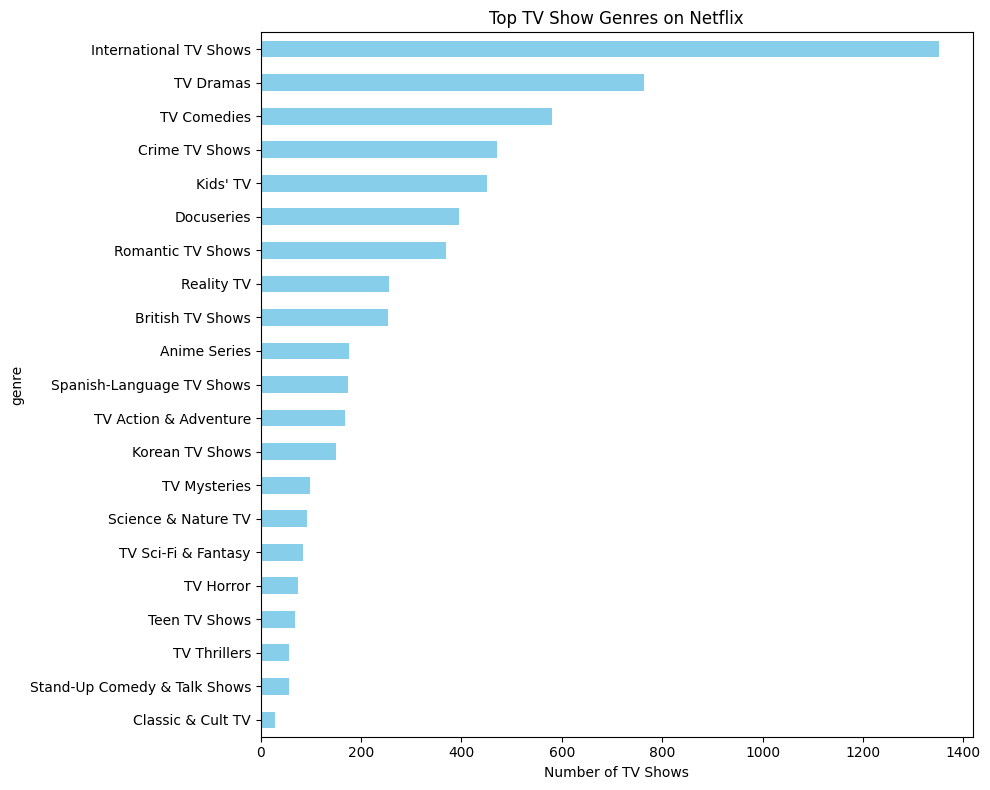

In [25]:
# Filter for only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Drop missing genre entries
tv_shows = tv_shows.dropna(subset=['listed_in'])

# Split genres and explode into rows
tv_shows['genre'] = tv_shows['listed_in'].str.split(', ')
tv_shows = tv_shows.explode('genre')

# Count occurrences of each genre
genre_counts = tv_shows['genre'].value_counts()

# Display number of unique genres
print(f"🎭 Total unique genres in TV Shows: {genre_counts.shape[0]}")
print("\n📊 Genre counts:")
print(genre_counts)

# Plot top 15 genres as a horizontal bar chart
genre_counts.head(21).sort_values().plot(
    kind='barh',
    figsize=(10, 8),
    color='skyblue',
    title='Top TV Show Genres on Netflix'
)
plt.xlabel("Number of TV Shows")
plt.tight_layout()
plt.show()


/tmp/ipykernel_13534/841267257.py:19: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


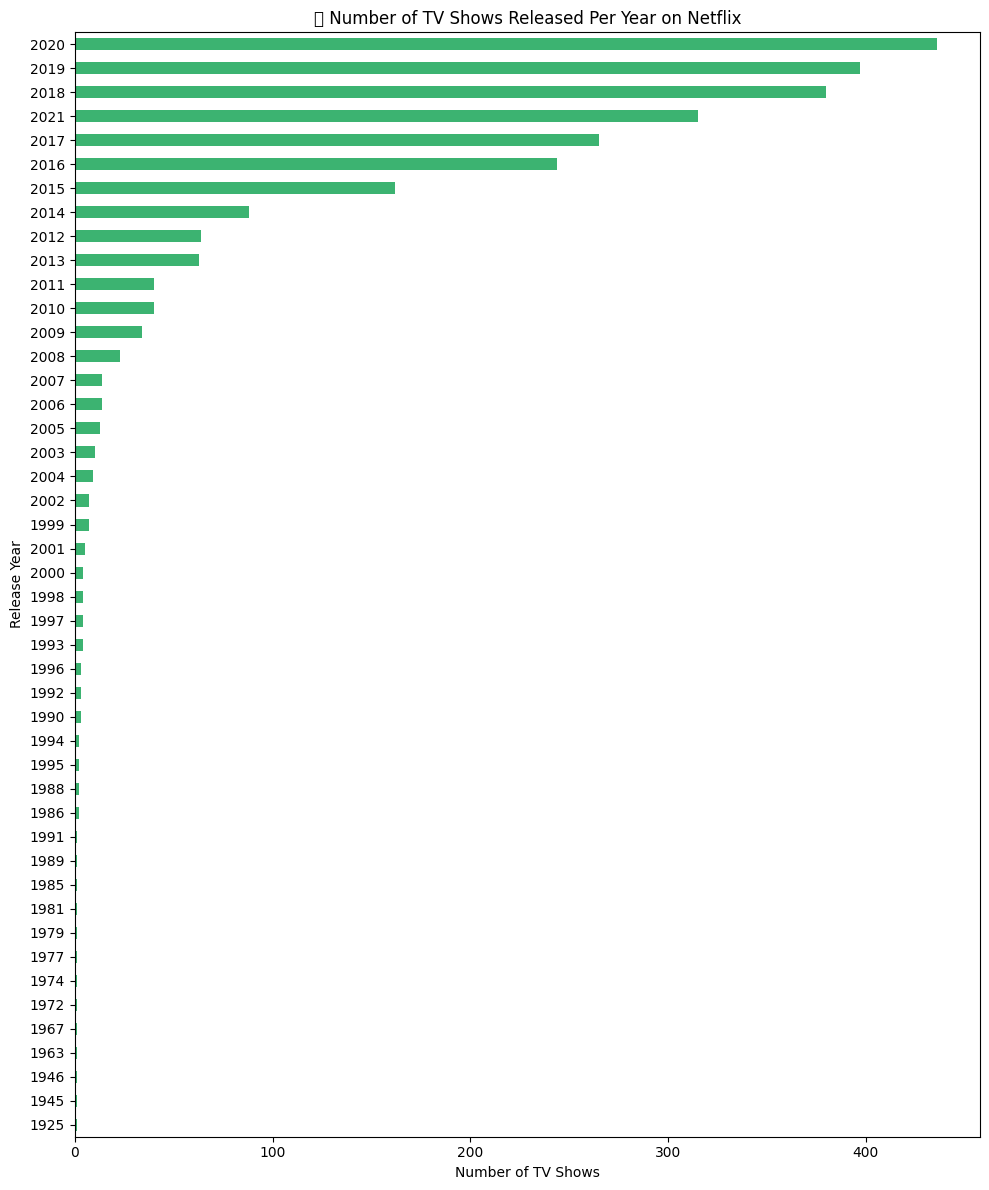

In [8]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Drop missing release year
tv_shows = tv_shows.dropna(subset=['release_year'])

# Count number of TV Shows released each year
year_counts = tv_shows['release_year'].value_counts().sort_index()

# Plot as horizontal bar chart
plt.figure(figsize=(10, 12))
year_counts.sort_values().plot(
    kind='barh',
    color='mediumseagreen',
    title='📅 Number of TV Shows Released Per Year on Netflix'
)
plt.xlabel("Number of TV Shows")
plt.ylabel("Release Year")
plt.tight_layout()
plt.show()


/tmp/ipykernel_13534/2843095814.py:19: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


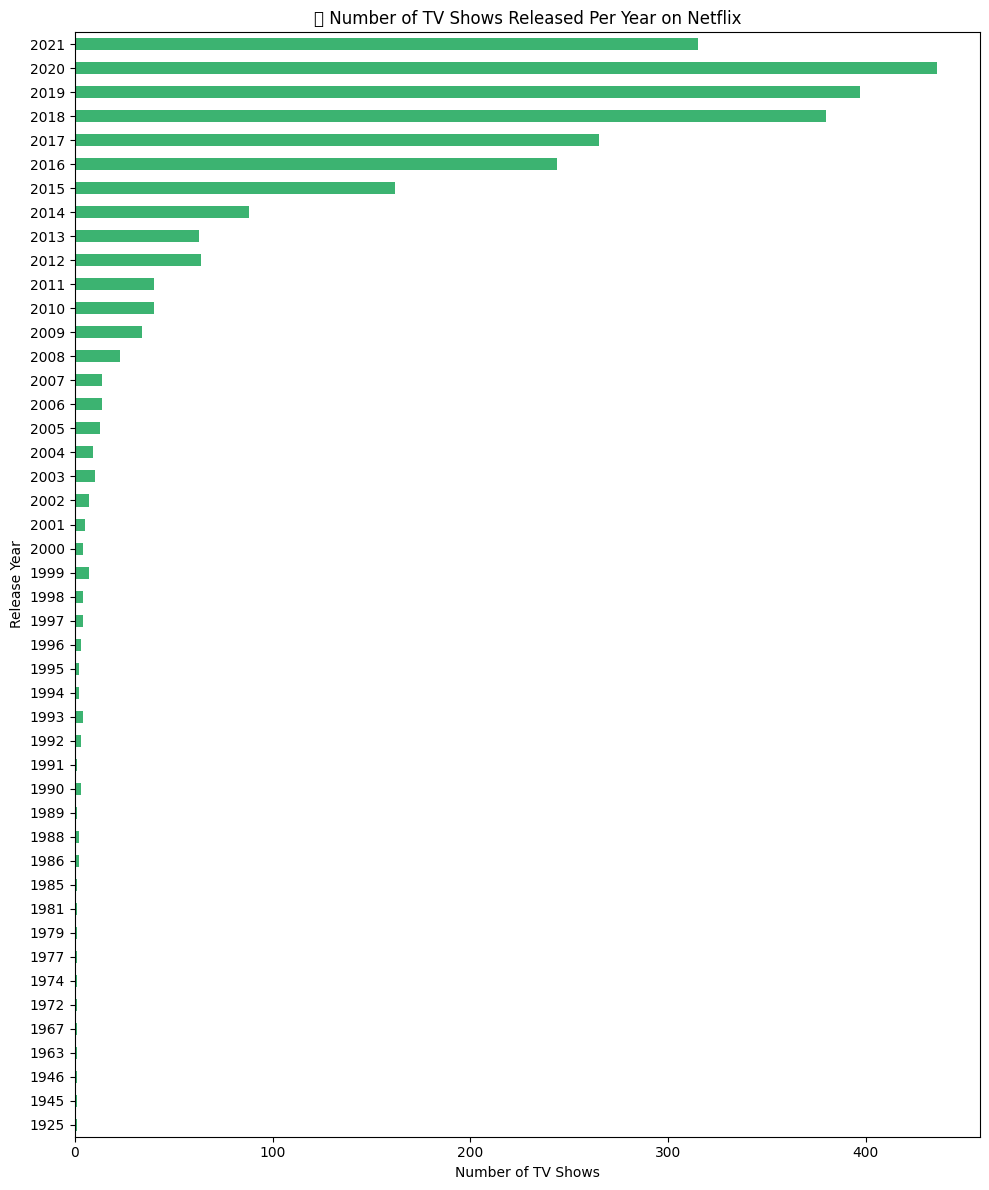

In [9]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Drop missing release year
tv_shows = tv_shows.dropna(subset=['release_year'])

# Count number of TV Shows released each year
year_counts = tv_shows['release_year'].value_counts().sort_index()

# Plot as horizontal bar chart with years descending from top to bottom
plt.figure(figsize=(10, 12))
year_counts.sort_index().plot(  
    kind='barh',
    color='mediumseagreen',
    title='📅 Number of TV Shows Released Per Year on Netflix'
)
plt.xlabel("Number of TV Shows")
plt.ylabel("Release Year")
plt.tight_layout()
plt.show()

/tmp/ipykernel_13534/3975673953.py:19: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


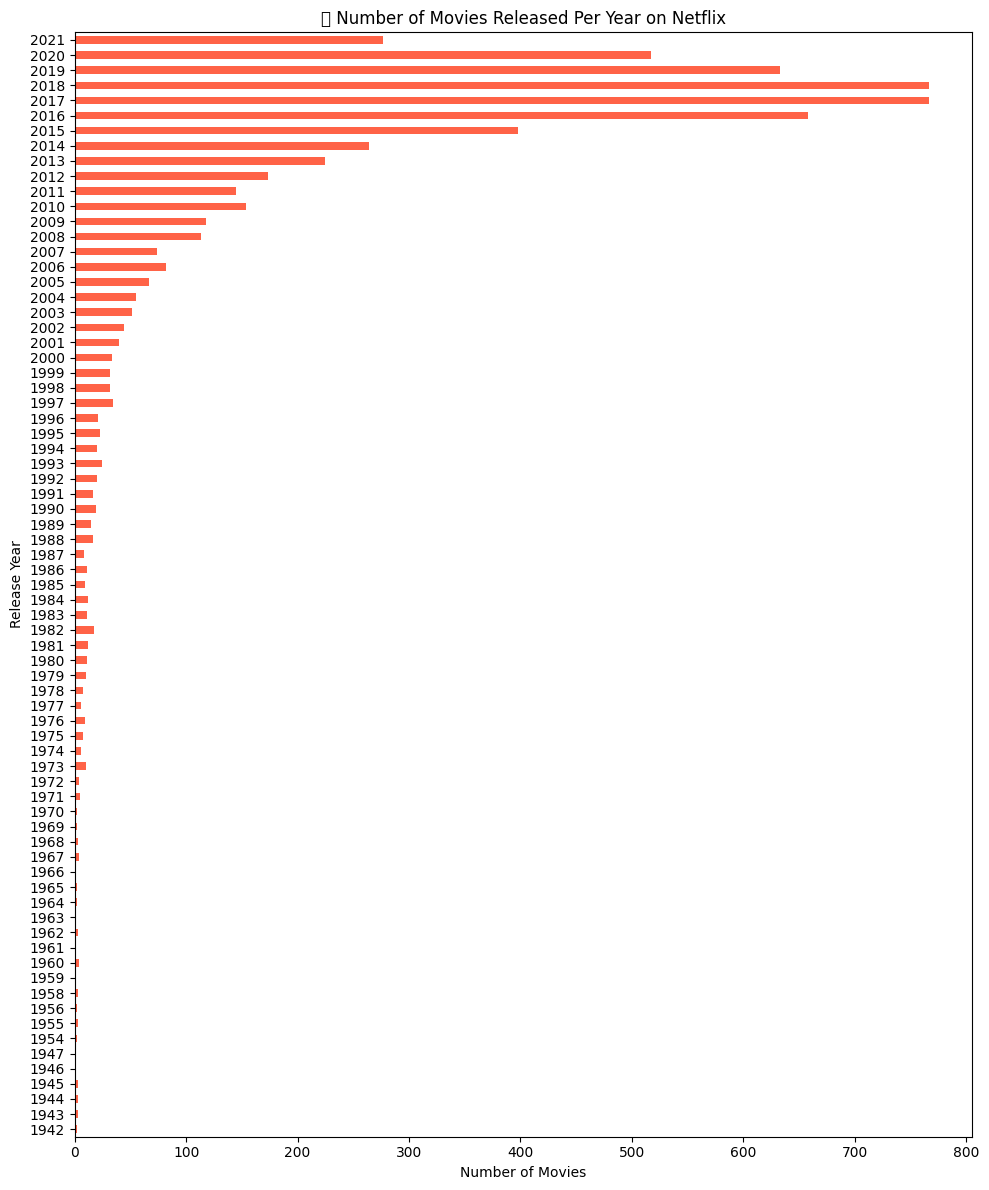

In [10]:
# Filter only Movies
movies = df[df['type'] == 'Movie'].copy()

# Drop rows with missing release year
movies = movies.dropna(subset=['release_year'])

# Count number of movies released per year
year_counts = movies['release_year'].value_counts().sort_index()

# Plot as horizontal bar chart
plt.figure(figsize=(10, 12))
year_counts.sort_index().plot(
    kind='barh',
    color='tomato',
    title='📅 Number of Movies Released Per Year on Netflix'
)
plt.xlabel("Number of Movies")
plt.ylabel("Release Year")
plt.tight_layout()
plt.show()


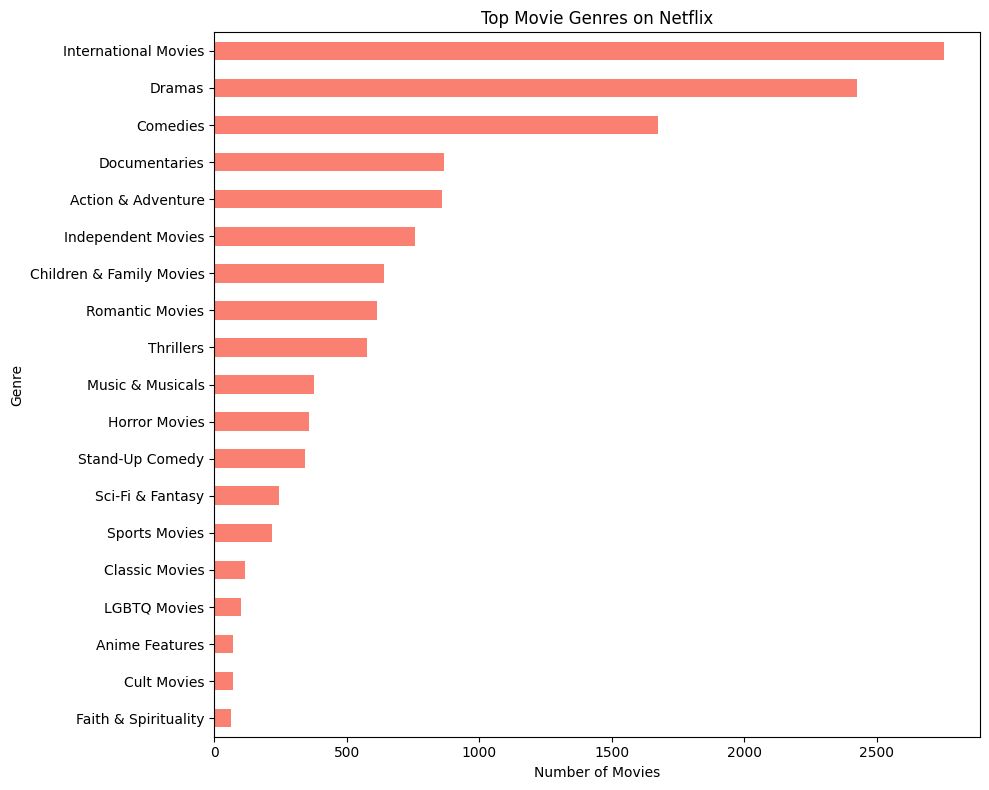

In [31]:
# Filter for Movies only
movies = df[df['type'] == 'Movie'].copy()

# Drop rows with missing genre info
movies = movies.dropna(subset=['listed_in'])

# Explode multiple genres into individual rows
movies['genre'] = movies['listed_in'].str.split(', ')
movies = movies.explode('genre')

# Count genre occurrences
genre_counts = movies['genre'].value_counts()

# Plot top 15 genres
plt.figure(figsize=(10, 8))
genre_counts.head(19).sort_values().plot(
    kind='barh',
    color='salmon',
    title='Top Movie Genres on Netflix'
)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


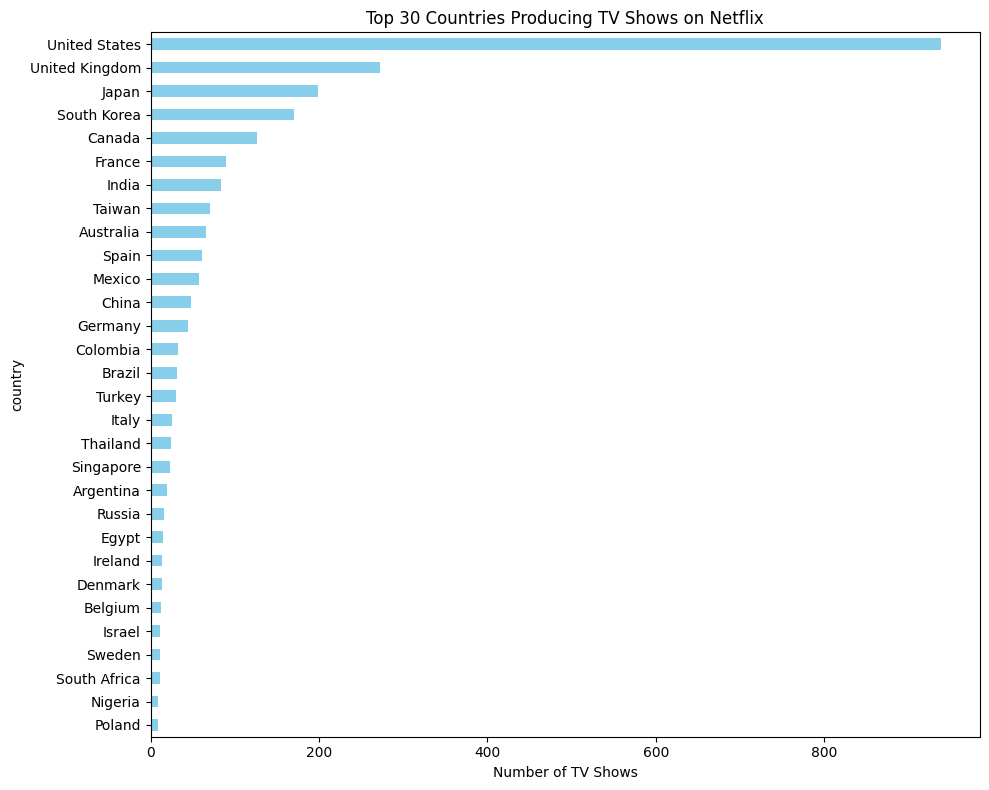

In [36]:
# Filter for TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Drop missing country values
tv_shows = tv_shows.dropna(subset=['country'])

# Split multiple countries and explode
tv_shows['country'] = tv_shows['country'].str.split(',')
tv_shows = tv_shows.explode('country')

# Clean whitespace
tv_shows['country'] = tv_shows['country'].str.strip()

# Count occurrences per country
country_counts = tv_shows['country'].value_counts()

# Plot top 15 countries
country_counts.head(30).sort_values().plot(
    kind='barh',
    figsize=(10, 8),
    color='skyblue',
    title='Top 30 Countries Producing TV Shows on Netflix'
)
plt.xlabel("Number of TV Shows")
plt.tight_layout()
plt.show()


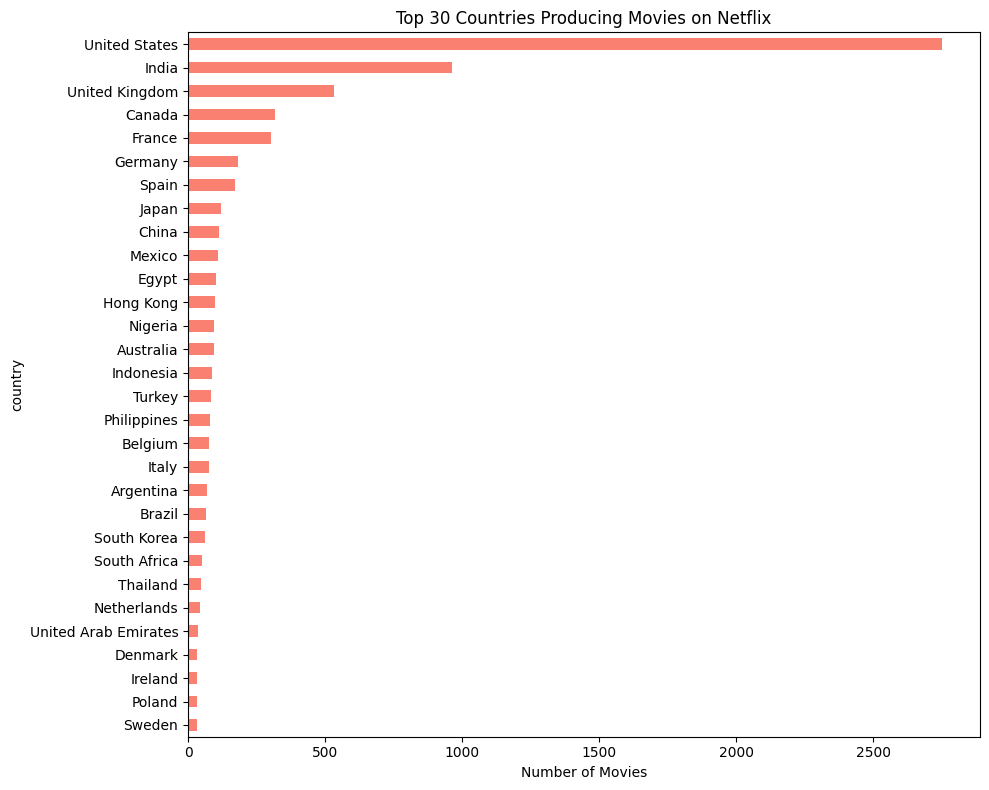

In [37]:
# Filter for TV Shows
movies = df[df['type'] == 'Movie'].copy()

# Drop missing country values
movies = movies.dropna(subset=['country'])

# Split multiple countries and explode
movies['country'] = movies['country'].str.split(',')
movies = movies.explode('country')

# Clean whitespace
movies['country'] = movies['country'].str.strip()

# Count occurrences per country
country_counts = movies['country'].value_counts()

# Plot top 15 countries
country_counts.head(30).sort_values().plot(
    kind='barh',
    figsize=(10, 8),
    color='salmon',
    title='Top 30 Countries Producing Movies on Netflix'
)
plt.xlabel("Number of Movies")
plt.tight_layout()
plt.show()

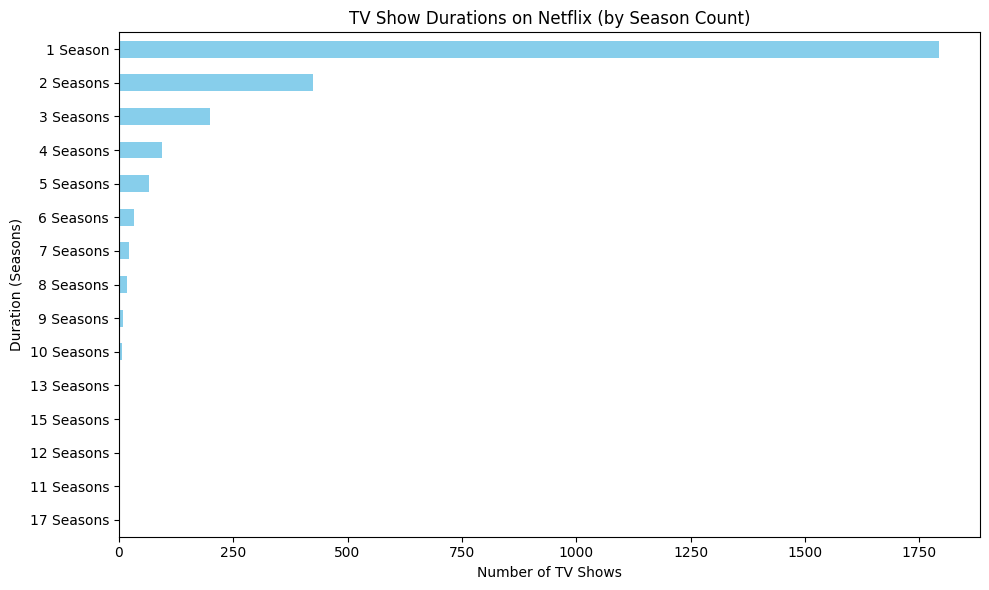

In [14]:
# Filter for TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Drop missing durations
tv_shows = tv_shows.dropna(subset=['duration'])

# Count how many shows for each unique duration
duration_counts = tv_shows['duration'].value_counts()

# Plot in descending order
duration_counts.sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    color='skyblue',
    title='TV Show Durations on Netflix (by Season Count)'
)

plt.xlabel('Number of TV Shows')
plt.ylabel('Duration (Seasons)')
plt.tight_layout()
plt.show()


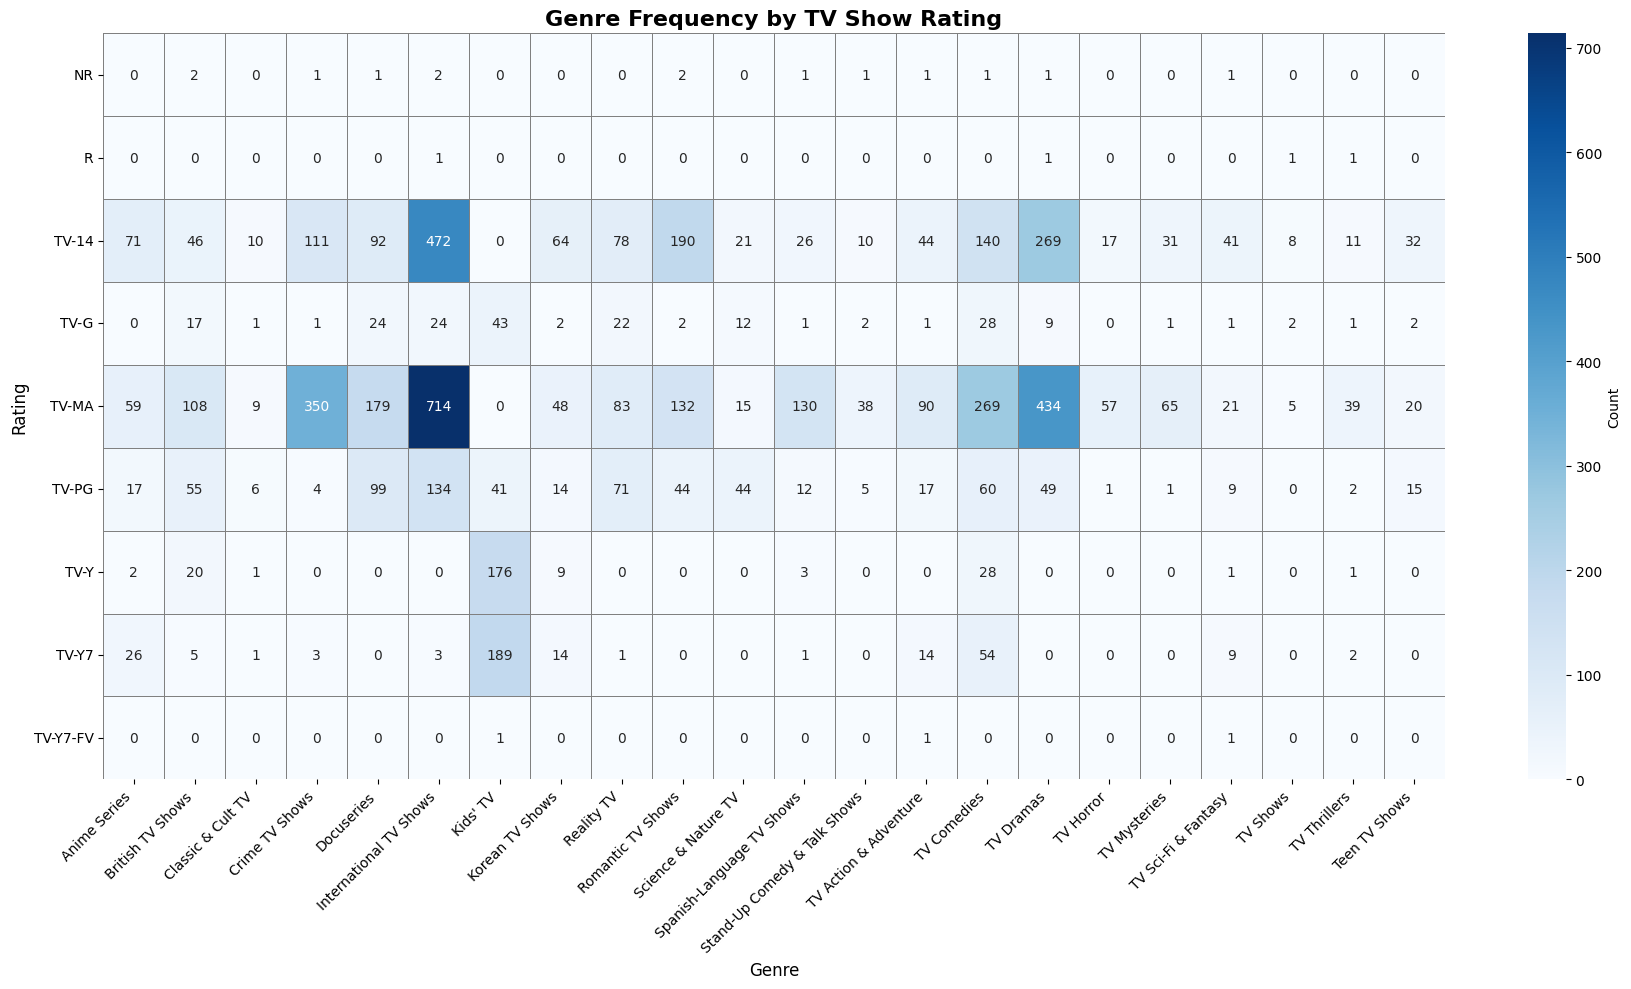

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for TV Shows and drop missing values
tv_shows = df[df['type'] == 'TV Show'].dropna(subset=['rating', 'listed_in'])

# Step 2: Split 'listed_in' into genres and explode
tv_shows['genre'] = tv_shows['listed_in'].str.split(',')
tv_shows = tv_shows.explode('genre')
tv_shows['genre'] = tv_shows['genre'].str.strip()

# ✅ Step 3: Remove clearly invalid genre entries
invalid_genres = ['']  # You can add more if needed
tv_shows = tv_shows[~tv_shows['genre'].isin(invalid_genres)]

# Step 4: Group by rating and genre, count occurrences
genre_rating_counts = tv_shows.groupby(['rating', 'genre']).size().unstack(fill_value=0)

# Step 5: Plot the full heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(
    genre_rating_counts,
    cmap='Blues',
    annot=True,
    fmt='d',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Count'}
)

plt.title('Genre Frequency by TV Show Rating', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [16]:
print("Unique ratings being plotted:", genre_rating_counts.index.tolist())


Unique ratings being plotted: ['NR', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']


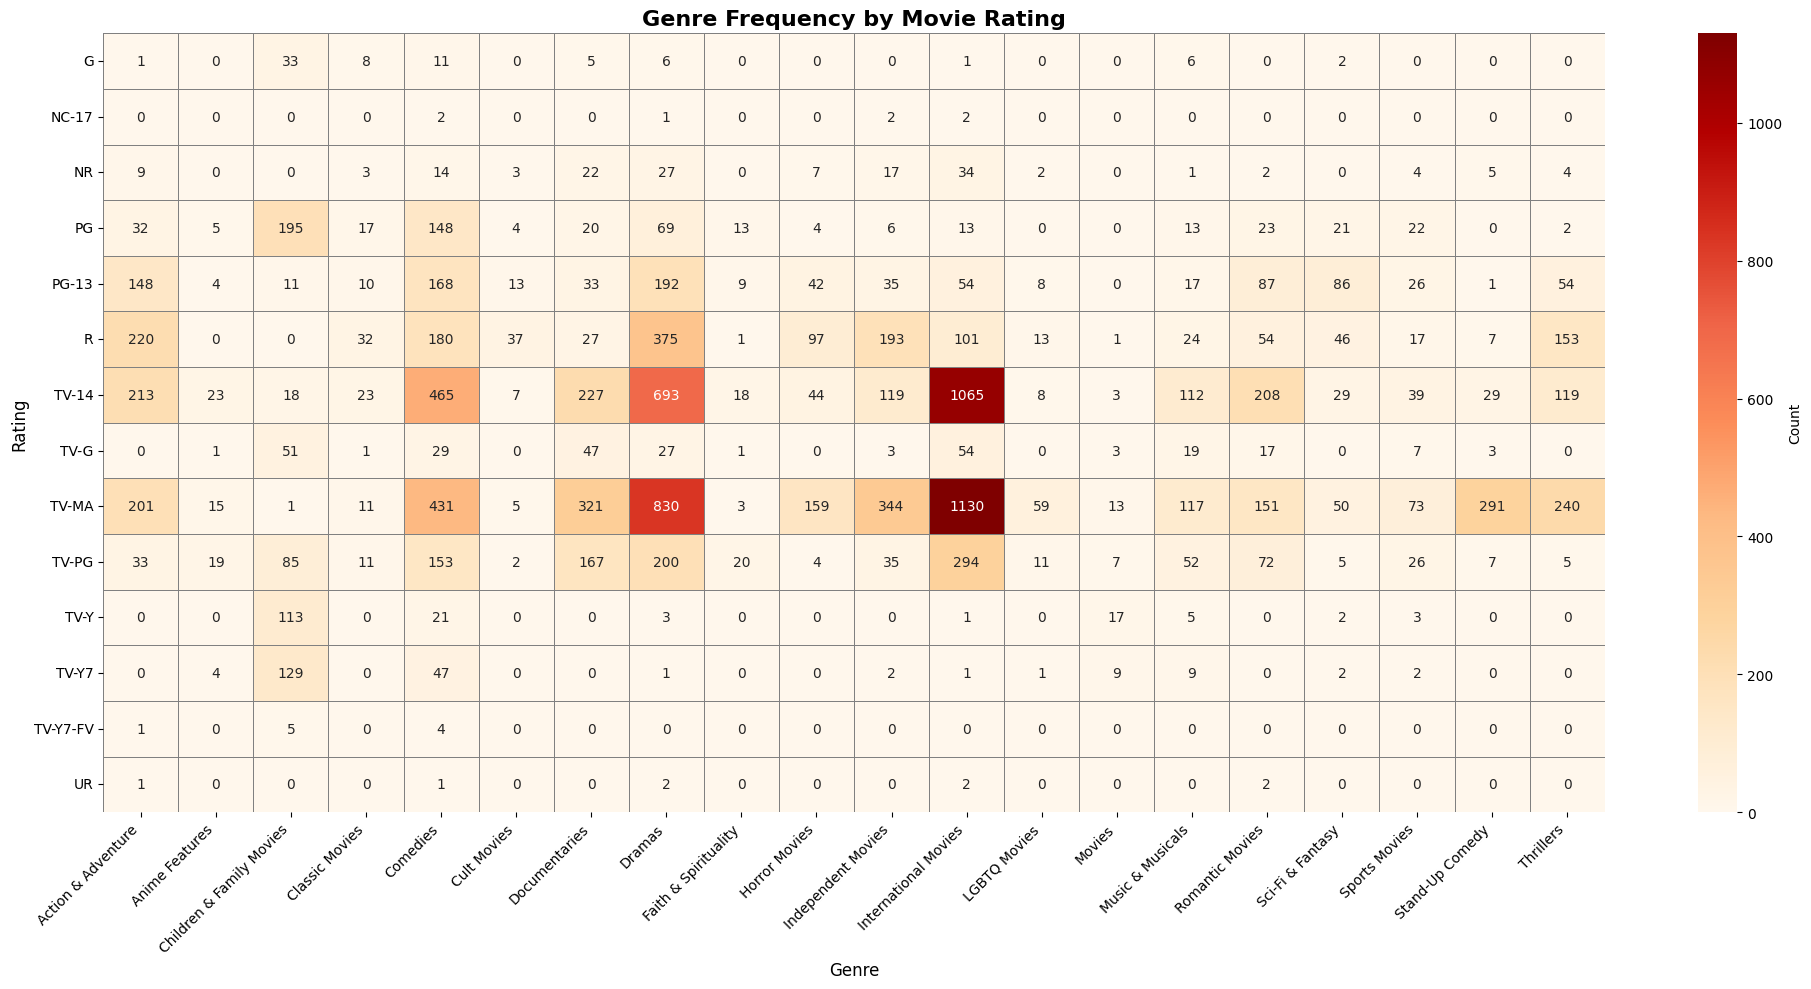

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for Movies and drop missing values
movies = df[df['type'] == 'Movie'].dropna(subset=['rating', 'listed_in'])

# Step 2: Split genres and explode into multiple rows
movies['genre'] = movies['listed_in'].str.split(',')
movies = movies.explode('genre')
movies['genre'] = movies['genre'].str.strip()

# ✅ Optional: Remove irrelevant genres (like typo leaks)
invalid_genres = ['TV Showes']  # If this or any other mislabels exist
movies = movies[~movies['genre'].isin(invalid_genres)]

# Step 3: Ensure rating values are valid (not duration leaks)
movies = movies[~movies['rating'].str.contains(r'\bmin\b|\bSeason\b', na=False)]

# Step 4: Count genres per rating
genre_rating_counts = movies.groupby(['rating', 'genre']).size().unstack(fill_value=0)

# ✅ Step 5: Include all genres (no filtering here)

# Step 6: Plot heatmap
plt.figure(figsize=(20, 10))  # Wider for more genres
sns.heatmap(
    genre_rating_counts,
    cmap='OrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Count'}
)

plt.title('Genre Frequency by Movie Rating', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


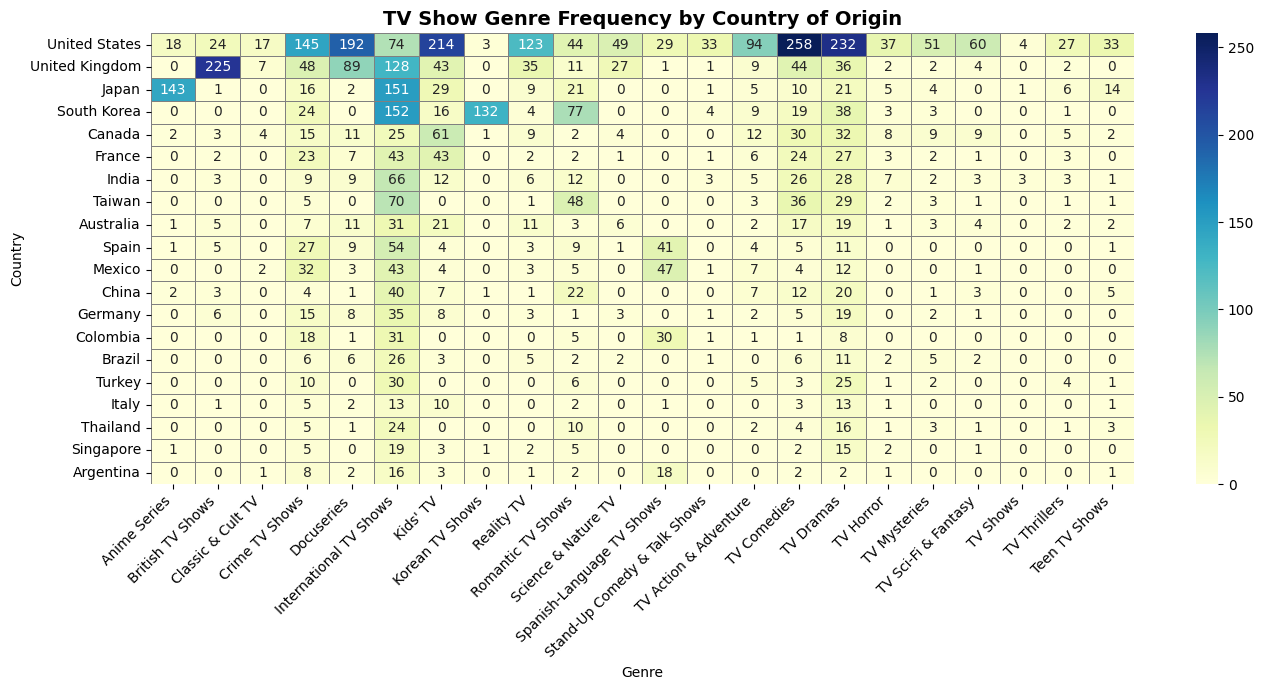

In [18]:
# Step 1: Filter for TV Shows only
tv_shows = df[df['type'] == 'TV Show'].copy()

# Step 2: Drop rows with missing country or listed_in
tv_shows = tv_shows.dropna(subset=['country', 'listed_in'])

# Step 3: Split multiple countries and genres
tv_shows['country'] = tv_shows['country'].str.split(',')
tv_shows = tv_shows.explode('country')
tv_shows['country'] = tv_shows['country'].str.strip()

# Step 4: Get top 20 countries based on count
top_20_tv_countries = tv_shows['country'].value_counts().head(20).index

# Step 5: Continue processing genres
tv_shows['genre'] = tv_shows['listed_in'].str.split(',')
tv_shows = tv_shows.explode('genre')
tv_shows['genre'] = tv_shows['genre'].str.strip()

# Step 6: Filter only top 20 countries
tv_shows = tv_shows[tv_shows['country'].isin(top_20_tv_countries)]

# Step 7: Count genres per country
country_genre_counts = tv_shows.groupby(['country', 'genre']).size().unstack(fill_value=0)

# Step 8: Reindex to match top 20 country order
country_genre_counts = country_genre_counts.reindex(top_20_tv_countries)

# Step 9: Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(
    country_genre_counts,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='d'
)

plt.title('TV Show Genre Frequency by Country of Origin', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



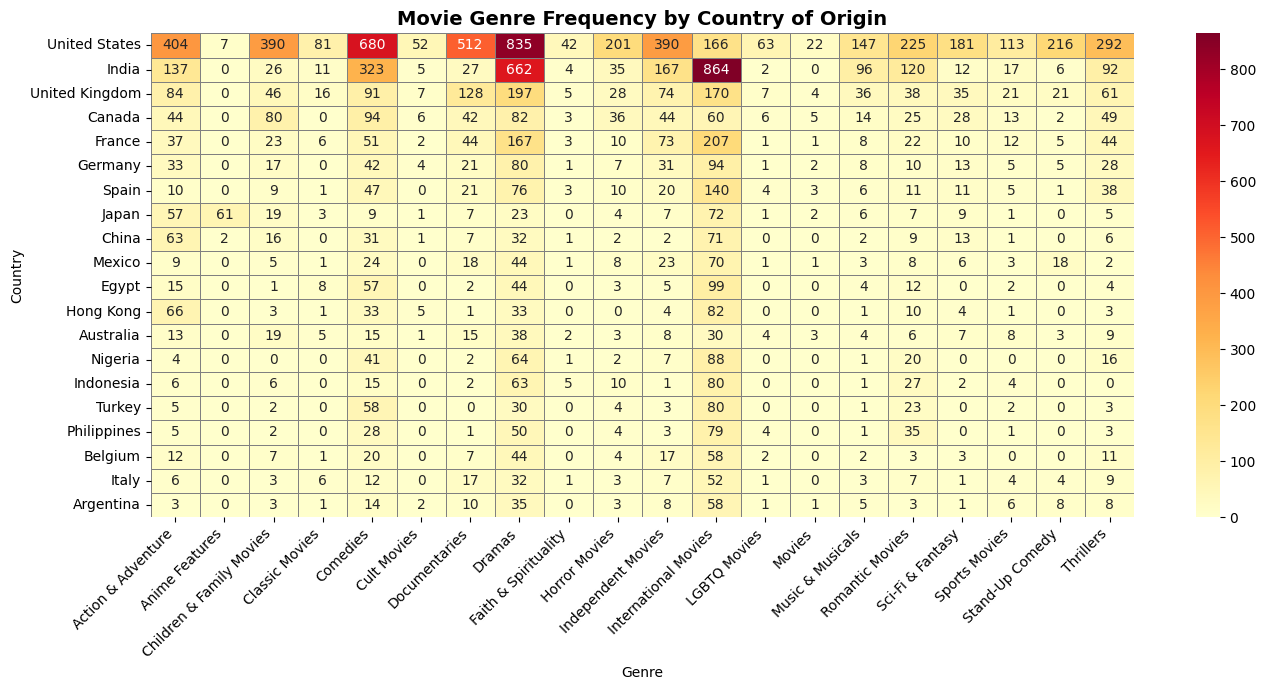

In [19]:
# Step 1: Filter for Movies only
movies = df[df['type'] == 'Movie'].copy()

# Step 2: Drop rows with missing country or listed_in
movies = movies.dropna(subset=['country', 'listed_in'])

# Step 3: Split multiple countries and explode
movies['country'] = movies['country'].str.split(',')
movies = movies.explode('country')
movies['country'] = movies['country'].str.strip()

# Get top 20 countries (from your original logic)
country_counts = movies['country'].value_counts()
top_20_countries = country_counts.head(20).index

# Step 4: Split and explode genres
movies['genre'] = movies['listed_in'].str.split(',')
movies = movies.explode('genre')
movies['genre'] = movies['genre'].str.strip()

# Step 5: Filter only top 20 countries
movies = movies[movies['country'].isin(top_20_countries)]

# Step 6: Count genres per country
movie_country_genre_counts = movies.groupby(['country', 'genre']).size().unstack(fill_value=0)

# Step 7: Reindex rows to ensure consistent order (optional: sort same as bar plot)
movie_country_genre_counts = movie_country_genre_counts.reindex(top_20_countries)

# Step 8: Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(
    movie_country_genre_counts,
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='d'
)

plt.title('Movie Genre Frequency by Country of Origin', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


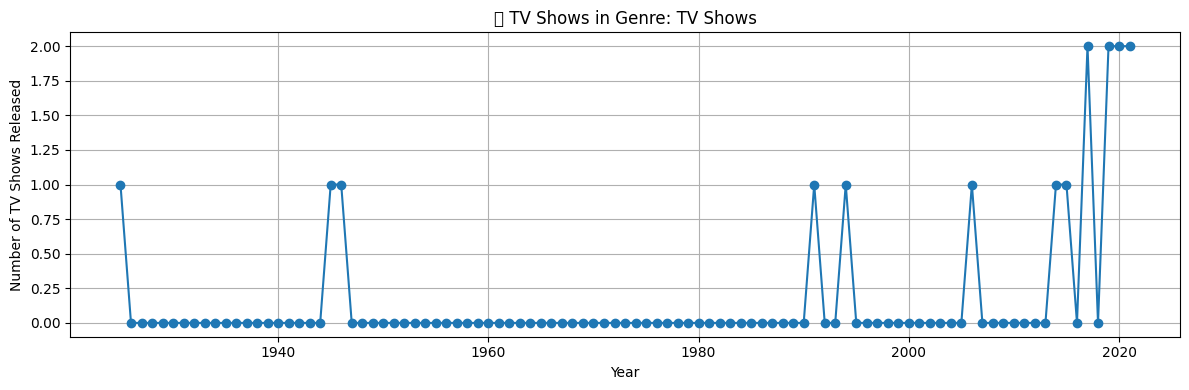

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


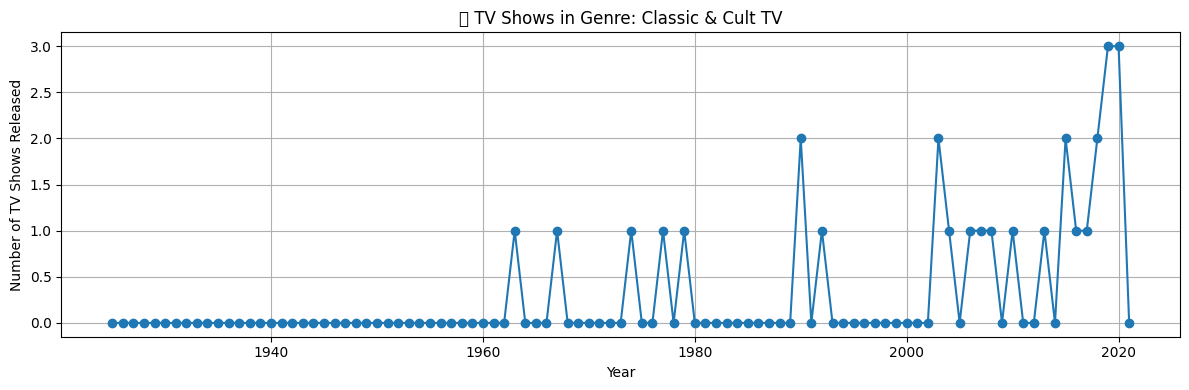

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


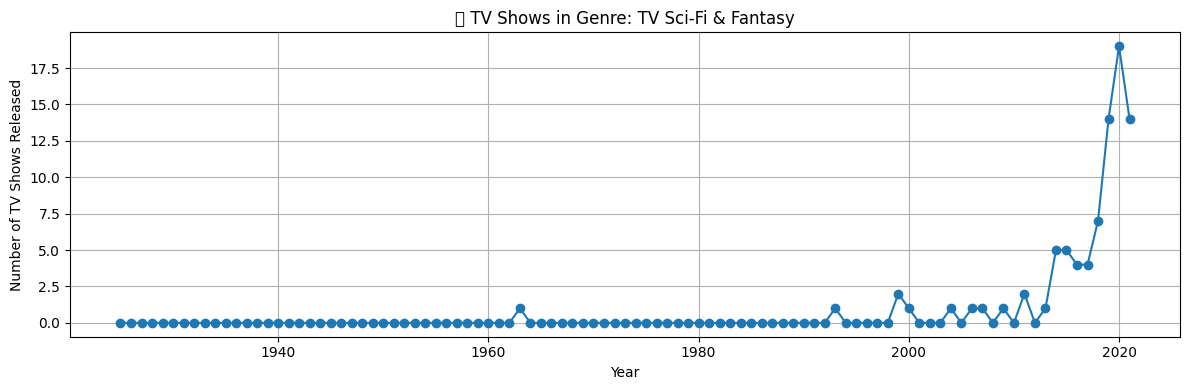

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


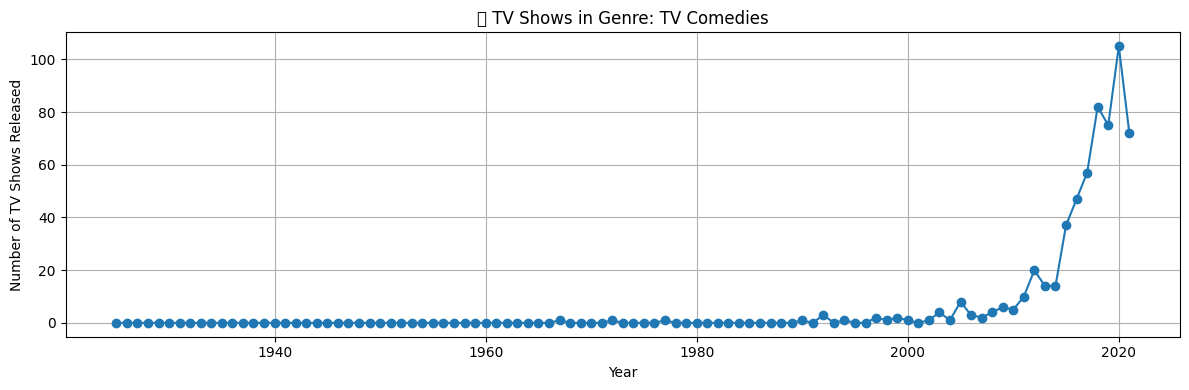

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


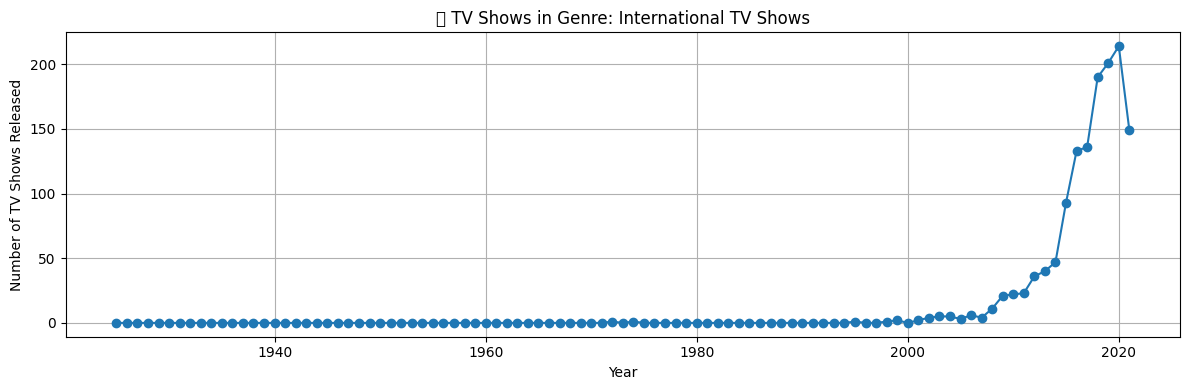

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


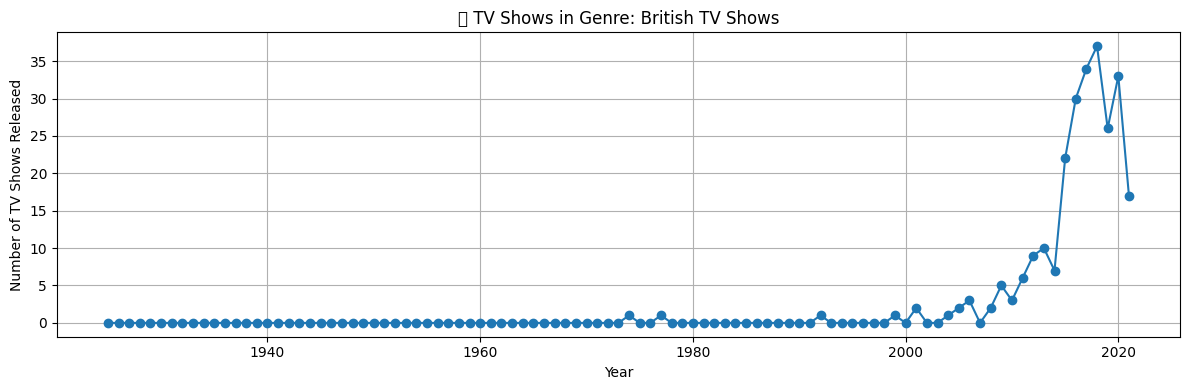

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


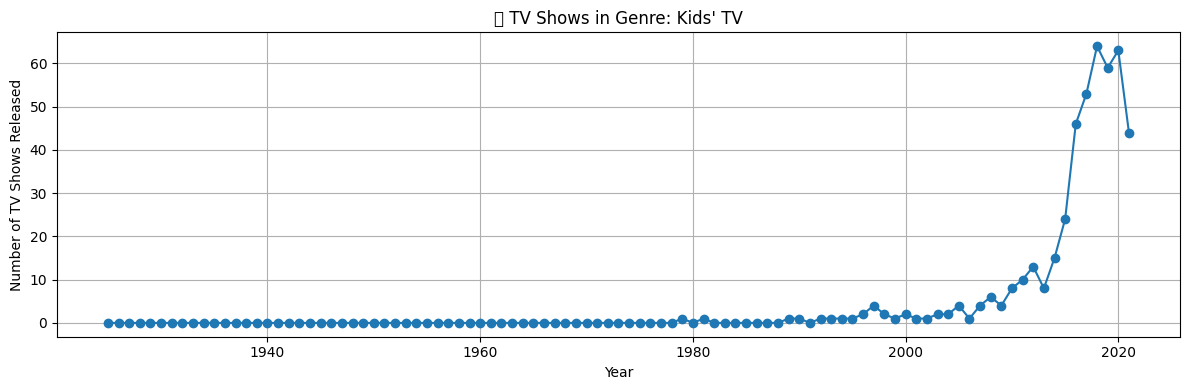

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


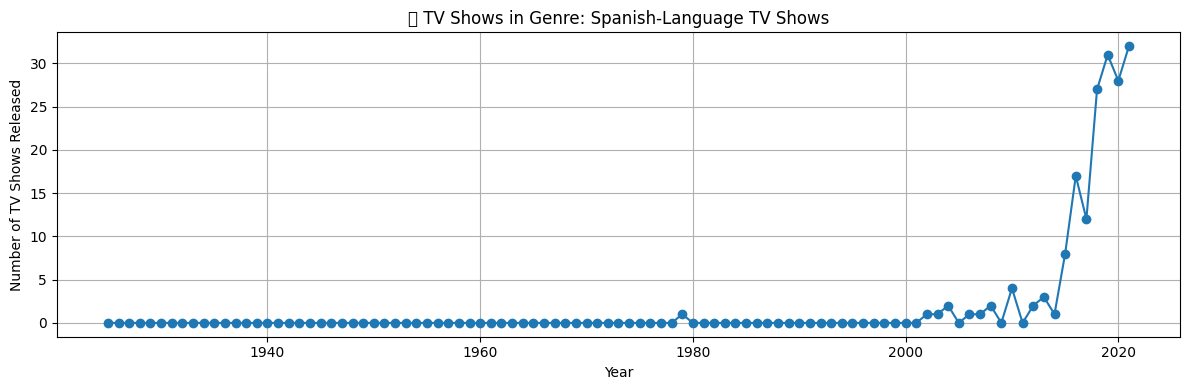

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


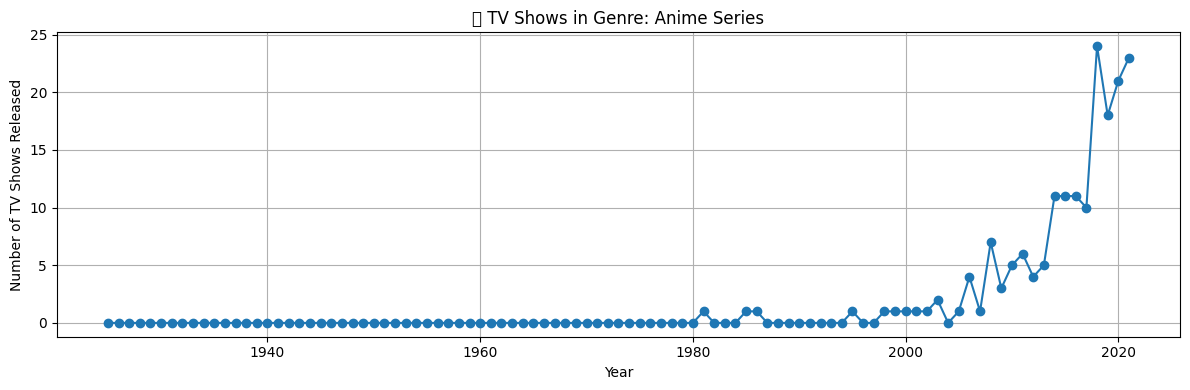

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


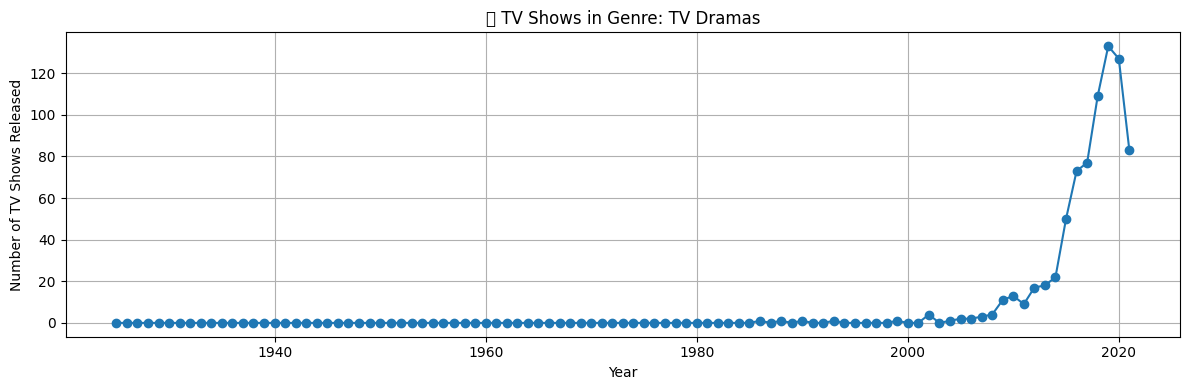

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


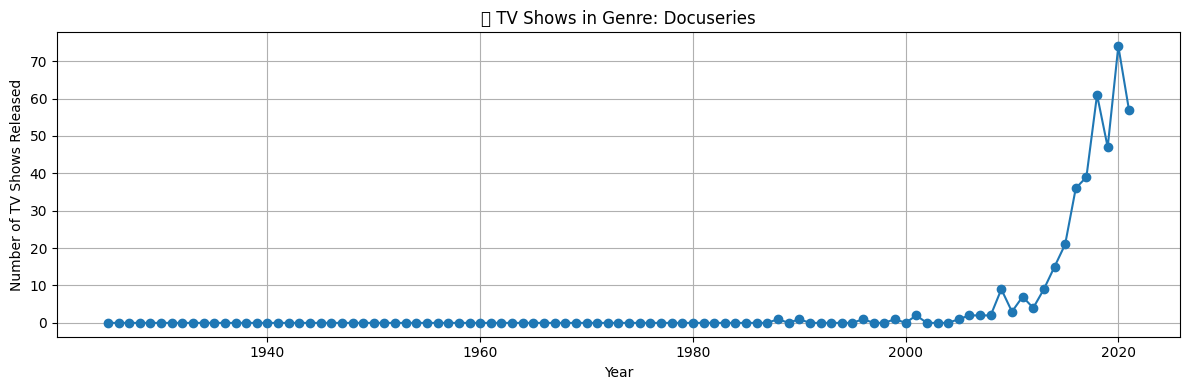

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


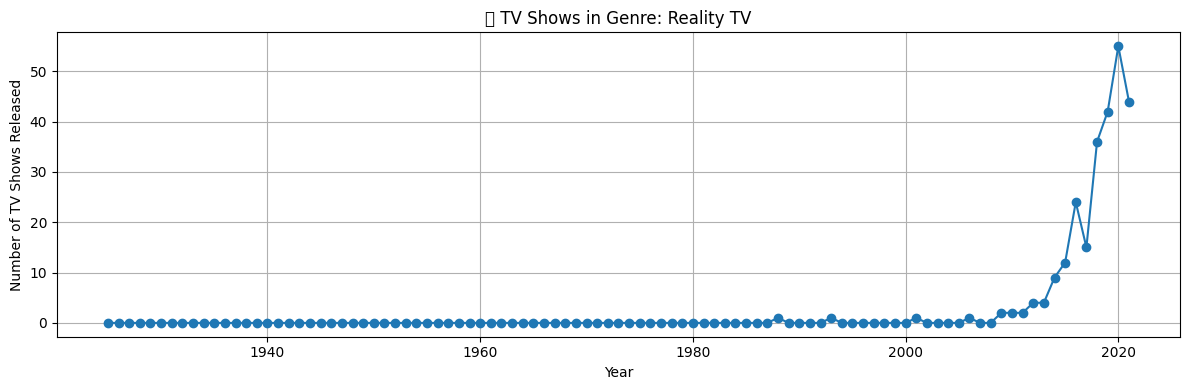

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


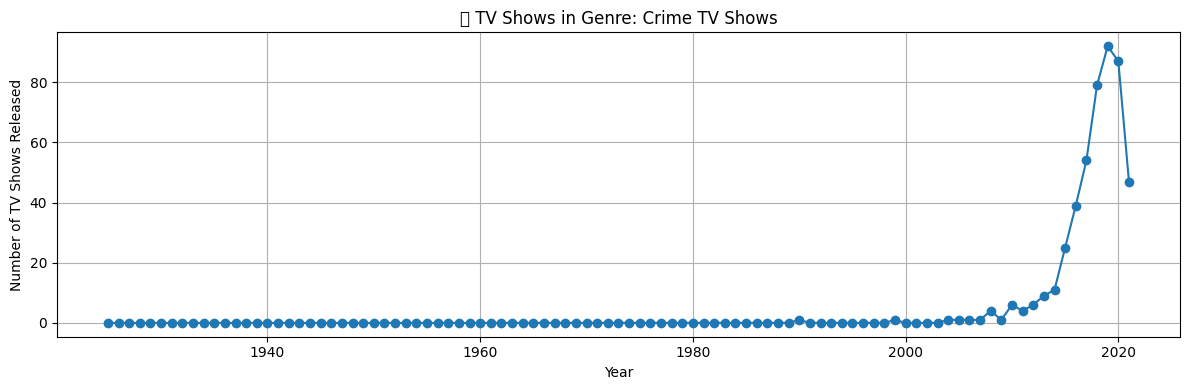

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


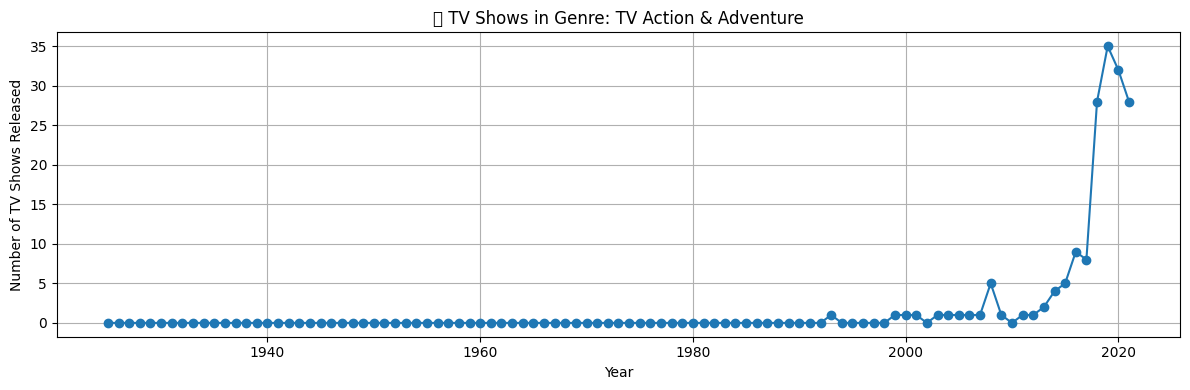

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


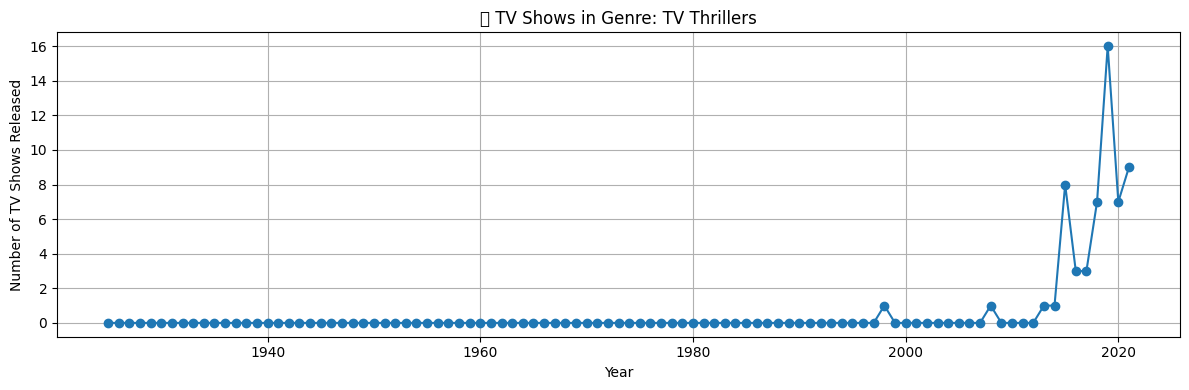

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


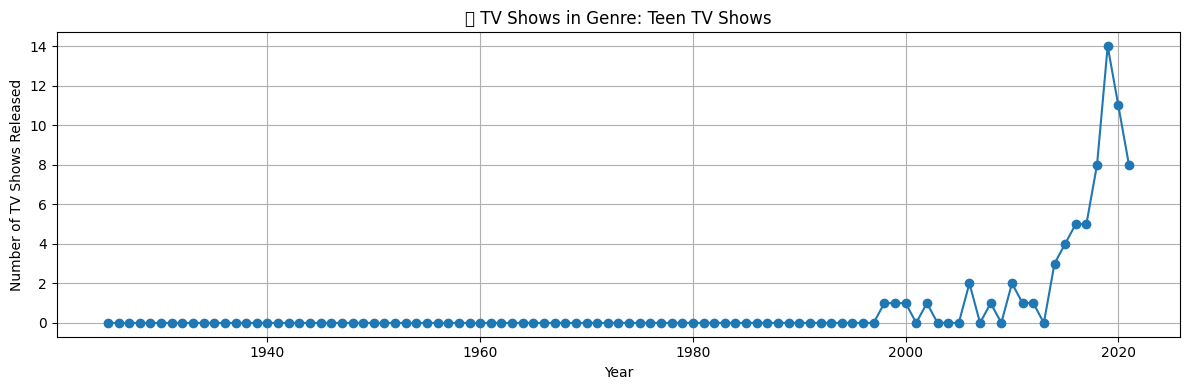

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


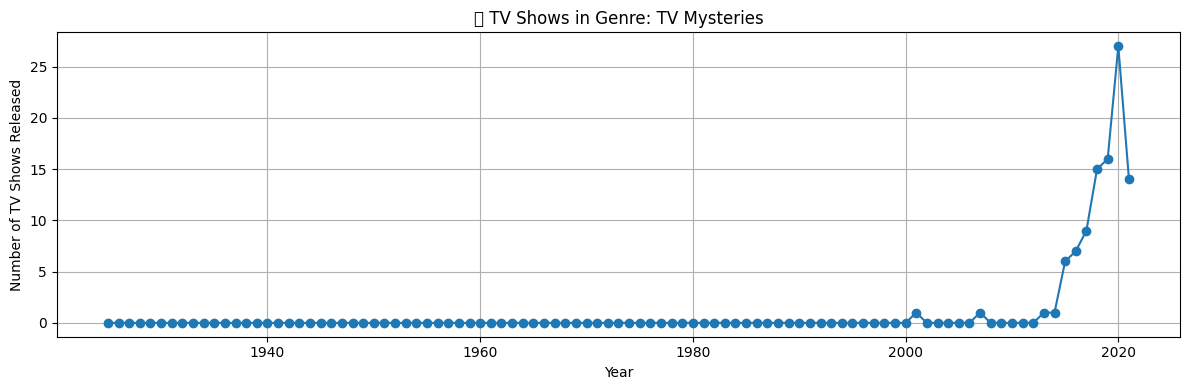

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


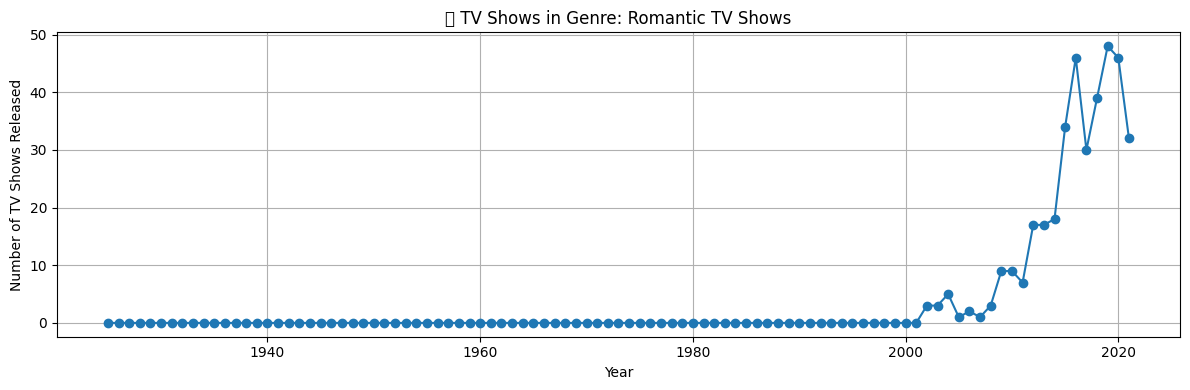

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


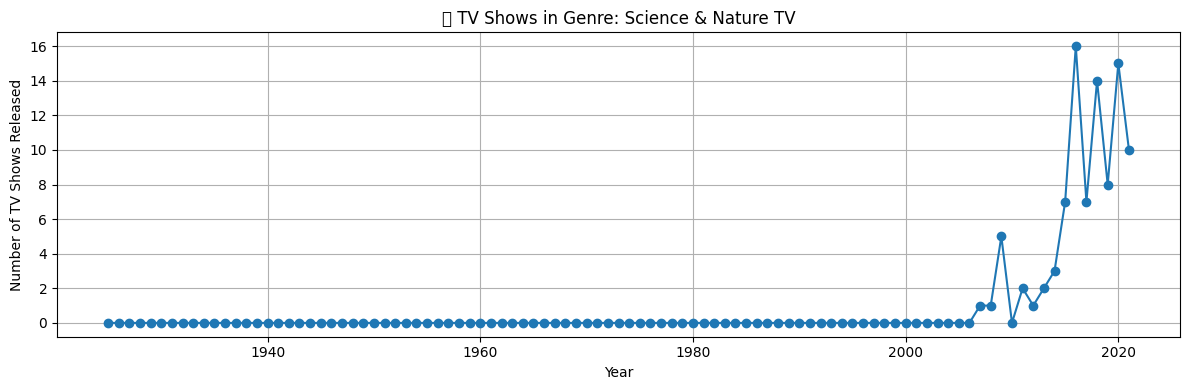

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


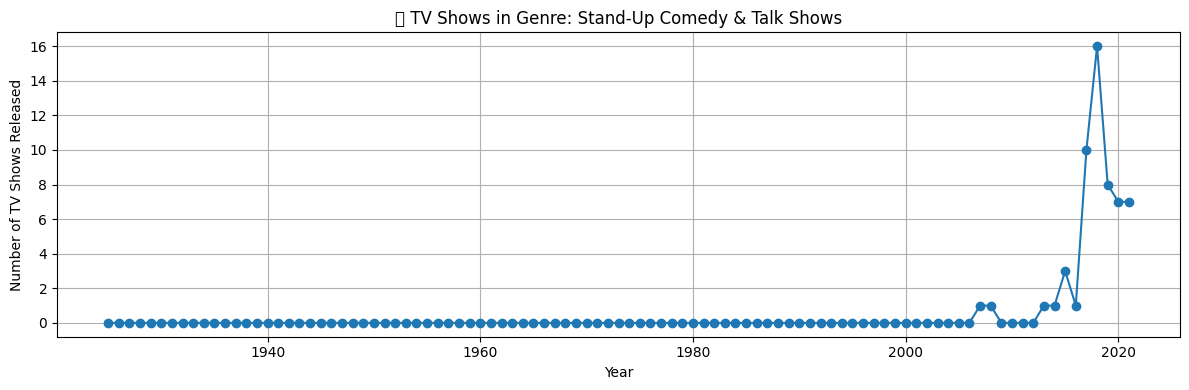

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


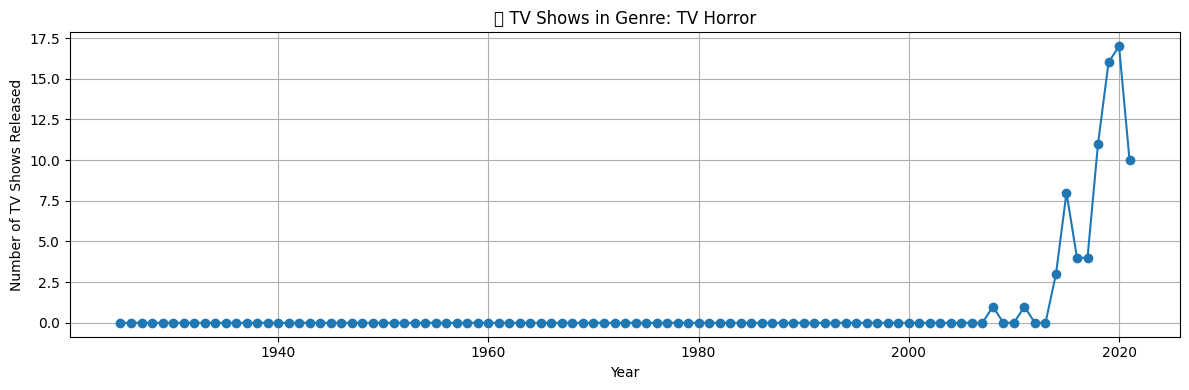

/tmp/ipykernel_13534/1430814451.py:35: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


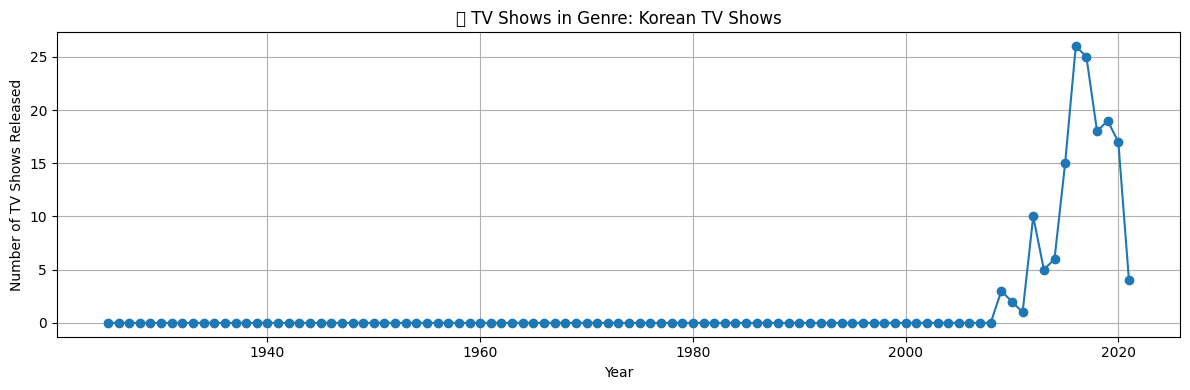

In [20]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Drop rows with missing release year or genres
tv_shows = tv_shows.dropna(subset=['release_year', 'listed_in'])

# Explode the genres (split by comma, then flatten into multiple rows)
tv_shows['genre'] = tv_shows['listed_in'].str.split(', ')
tv_shows = tv_shows.explode('genre')

# Group by release_year and genre, then count
genre_year_counts = tv_shows.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Get all unique genres
unique_genres = genre_year_counts['genre'].unique()

# Sort the data for consistent plotting
genre_year_counts = genre_year_counts.sort_values(by='release_year')

# Plotting one chart per genre
for genre in unique_genres:
    genre_data = genre_year_counts[genre_year_counts['genre'] == genre]

    # Ensure all years from 1925 to 2021 are represented (fill missing years with 0)
    all_years = pd.DataFrame({'release_year': range(1925, 2022)})
    genre_data = all_years.merge(genre_data, on='release_year', how='left').fillna({'genre': genre, 'count': 0})

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(genre_data['release_year'], genre_data['count'], marker='o', linestyle='-')
    plt.title(f"📺 TV Shows in Genre: {genre}")
    plt.xlabel("Year")
    plt.ylabel("Number of TV Shows Released")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


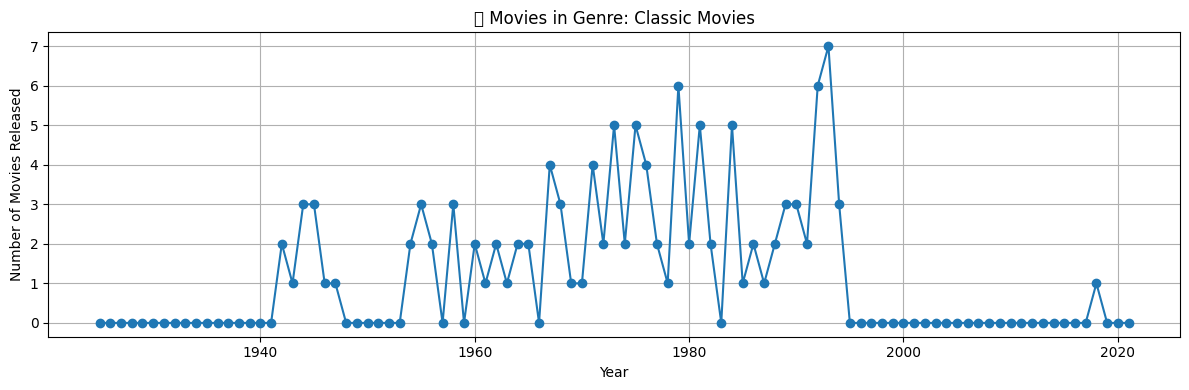

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


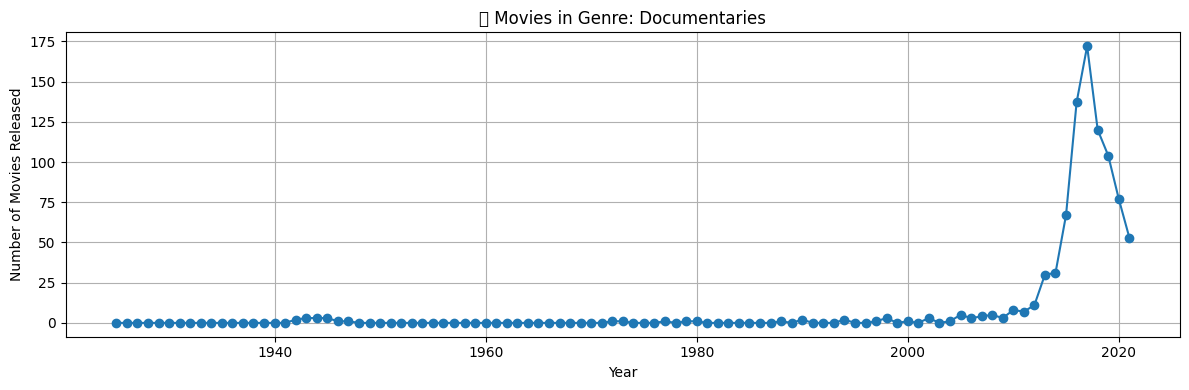

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


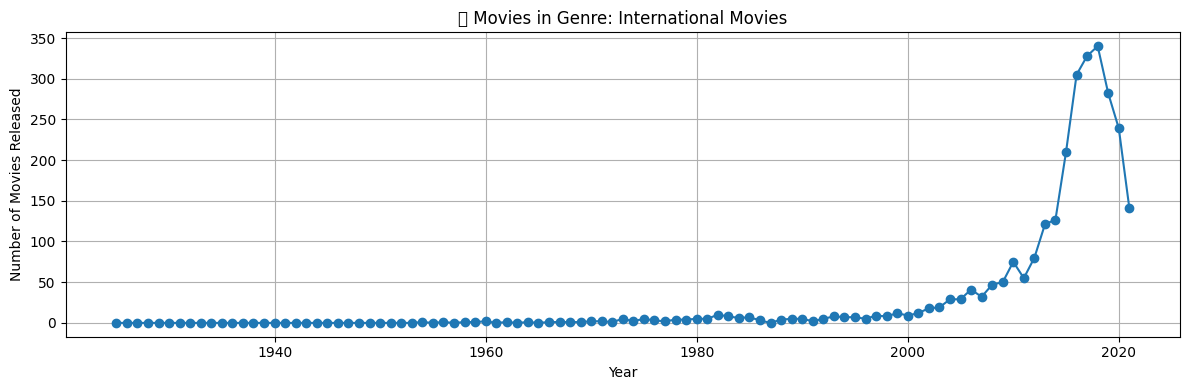

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


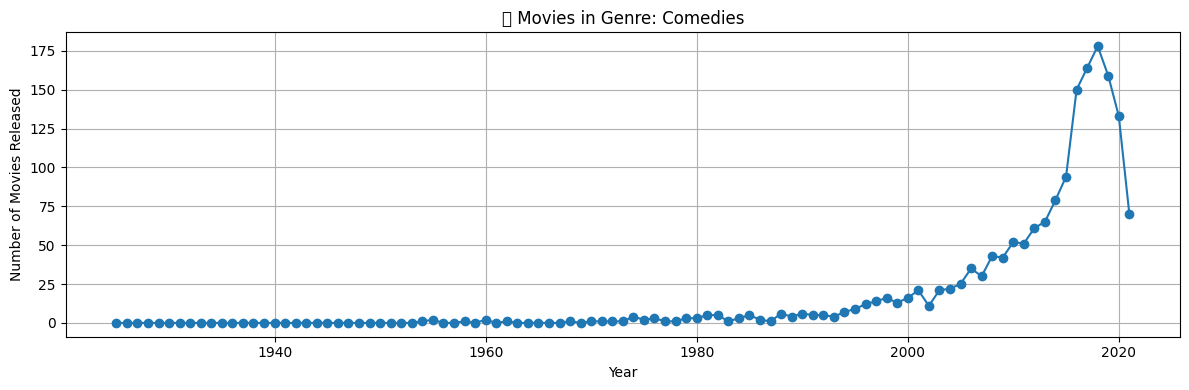

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


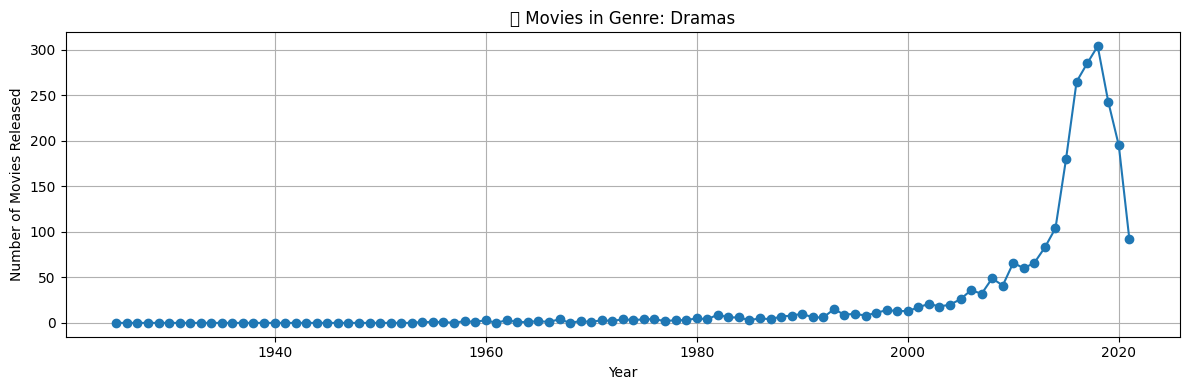

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


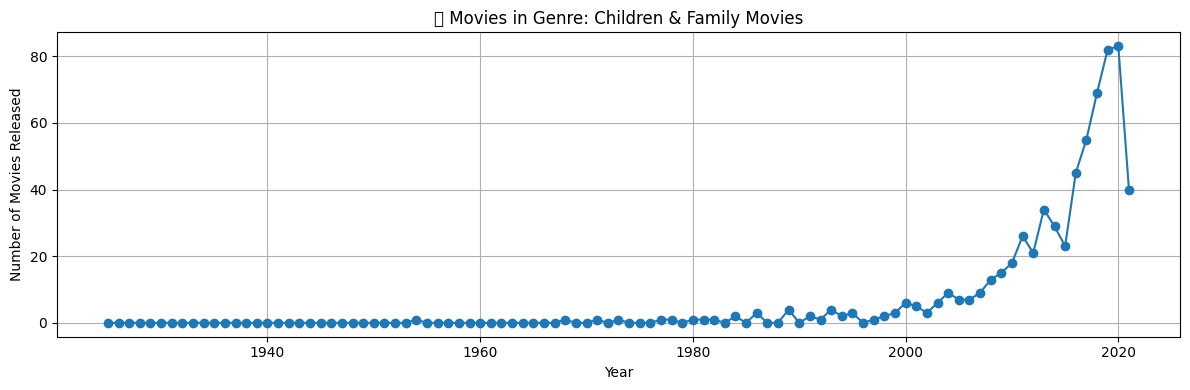

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


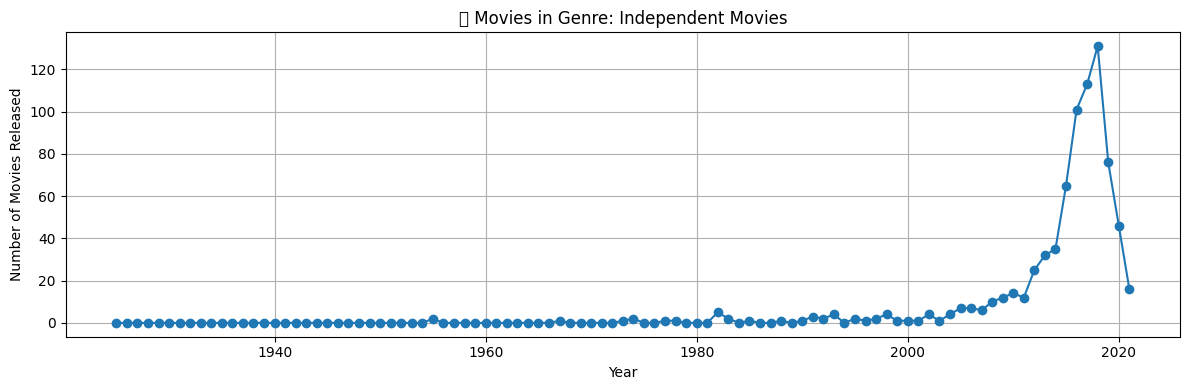

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


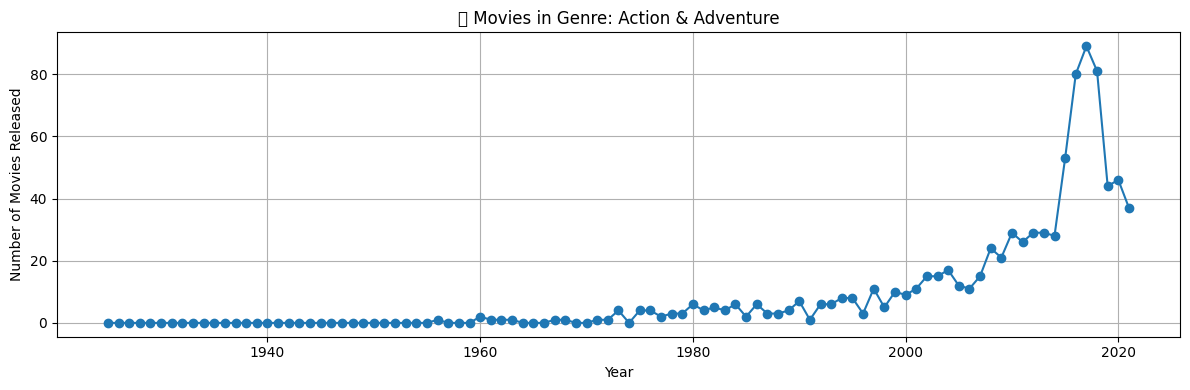

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


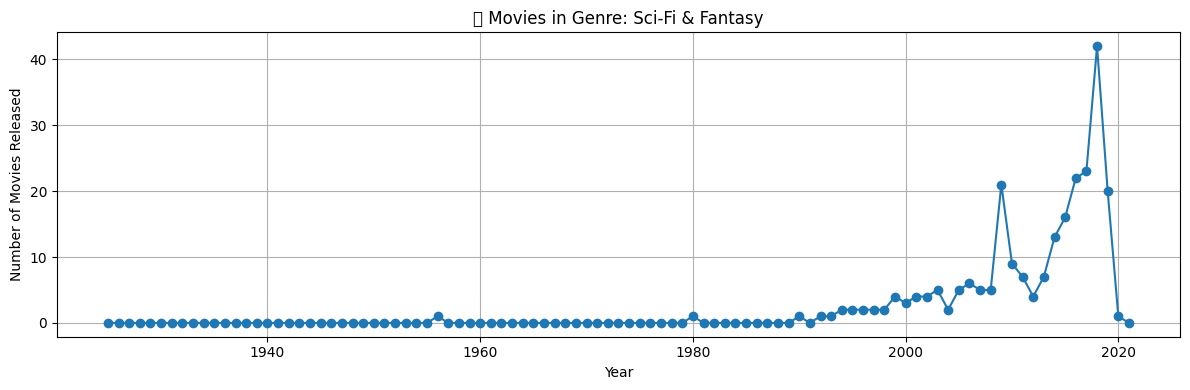

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


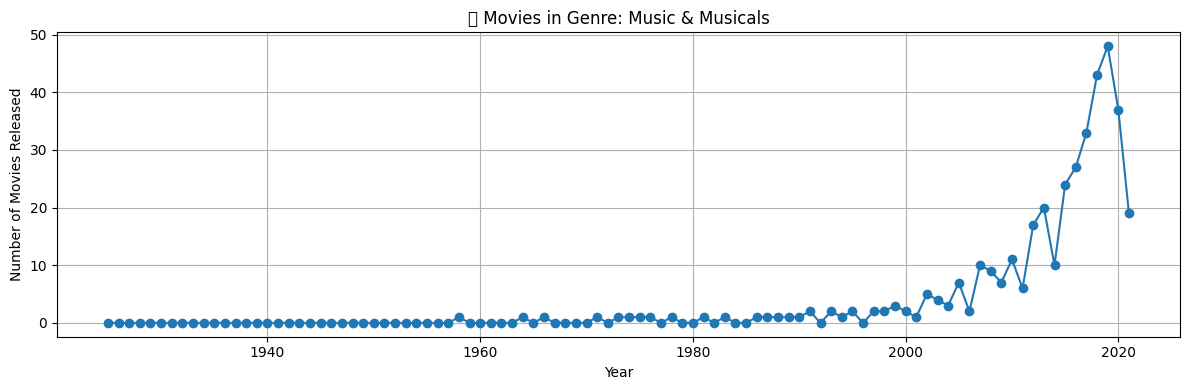

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


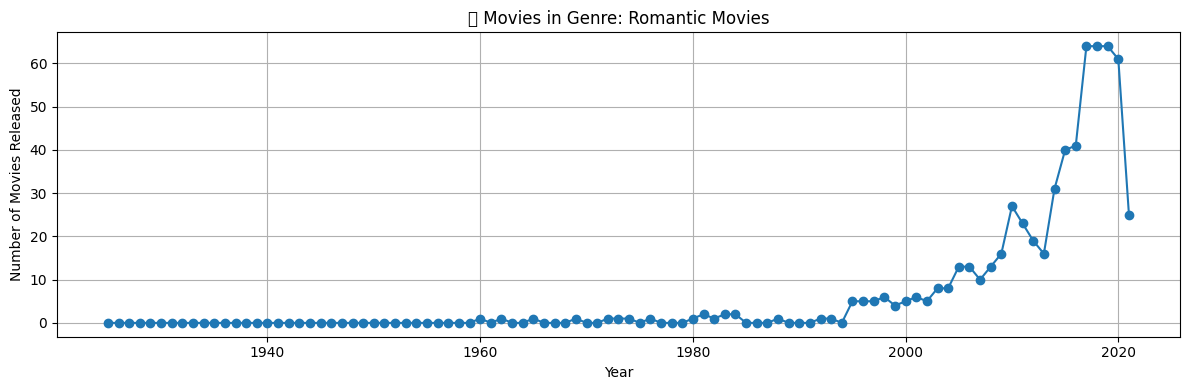

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


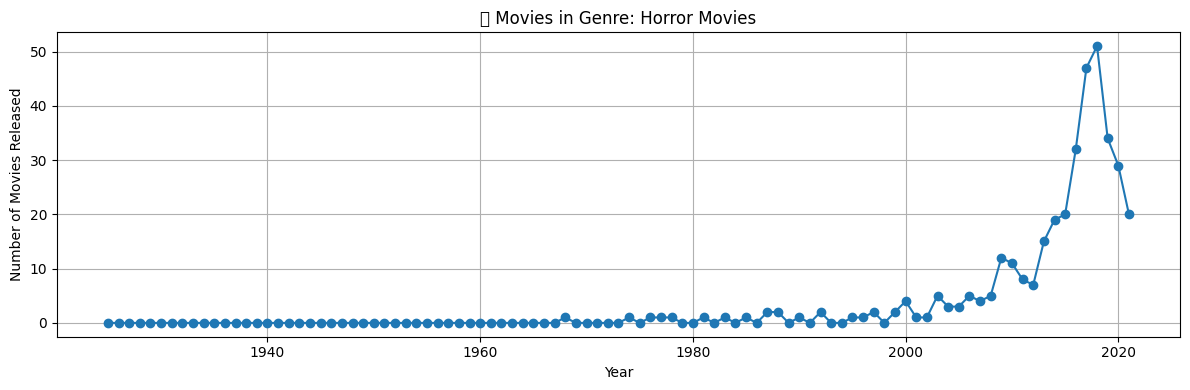

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


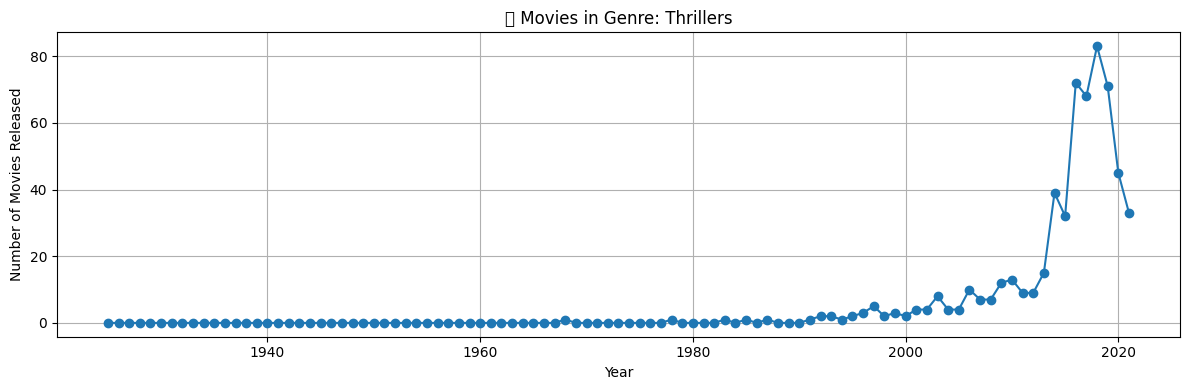

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


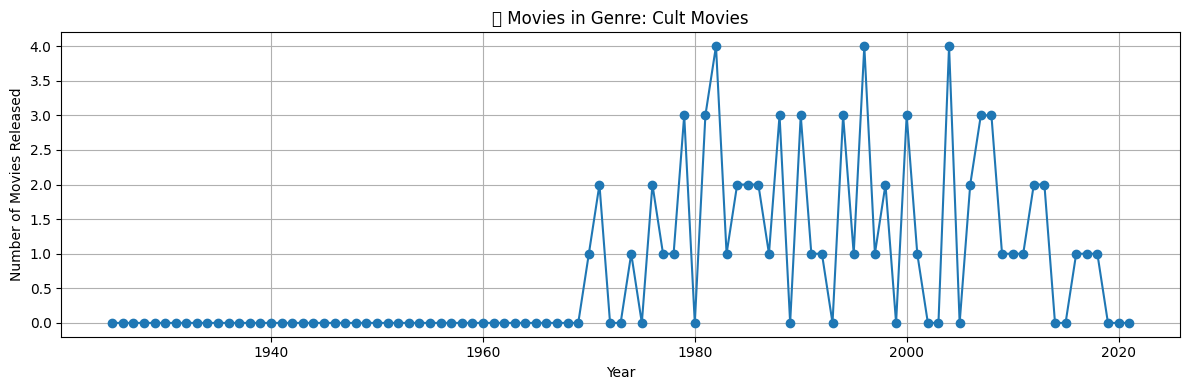

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


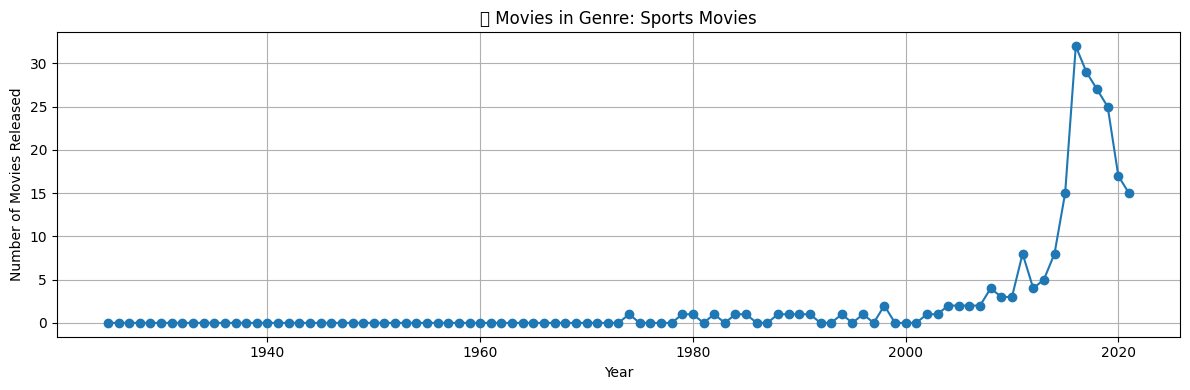

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


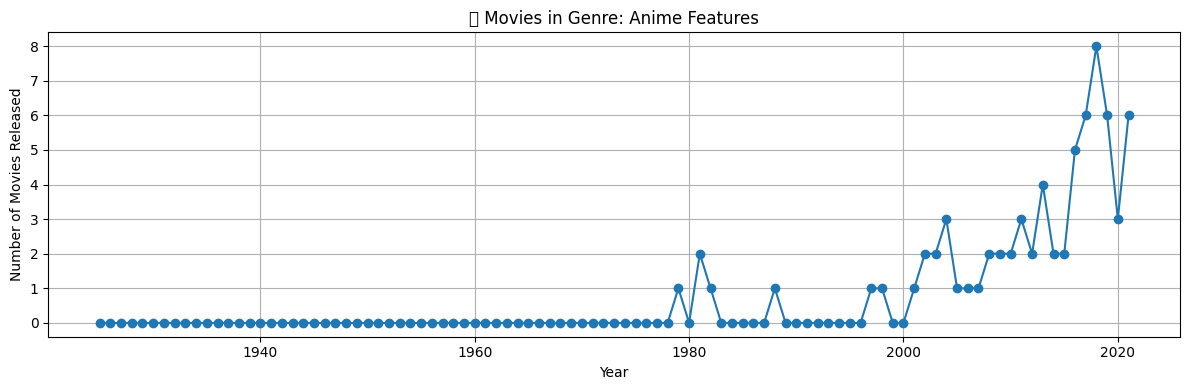

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


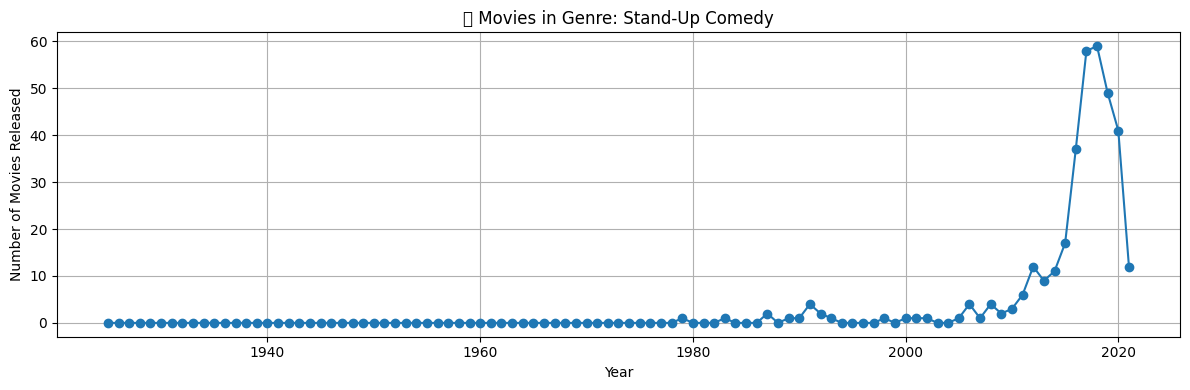

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


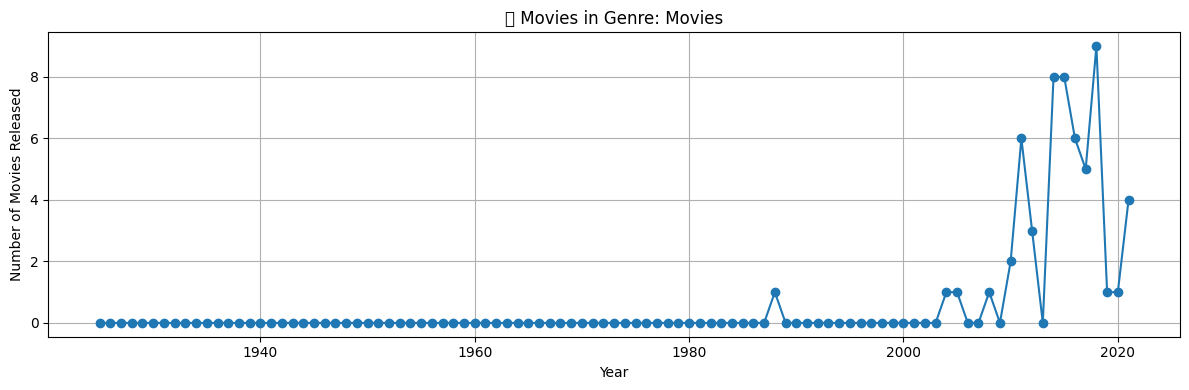

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


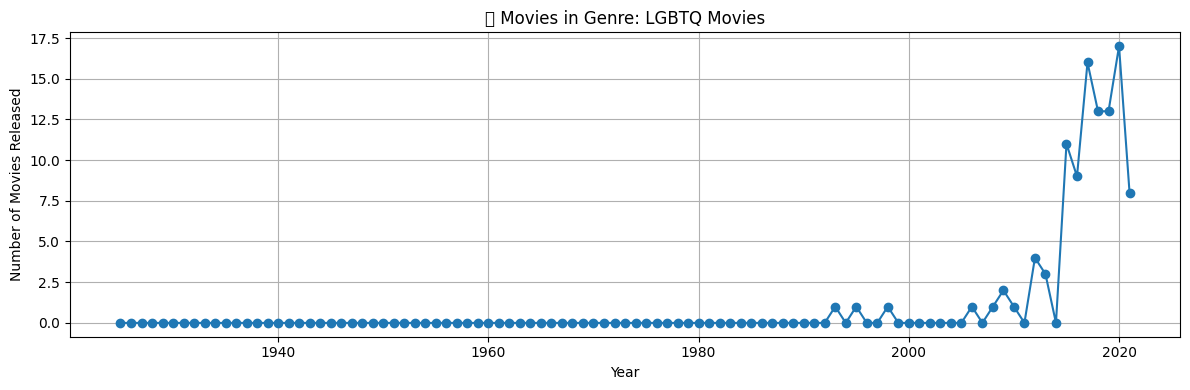

/tmp/ipykernel_13534/4100483477.py:41: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sina/venvs/myenv_Kaggle/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


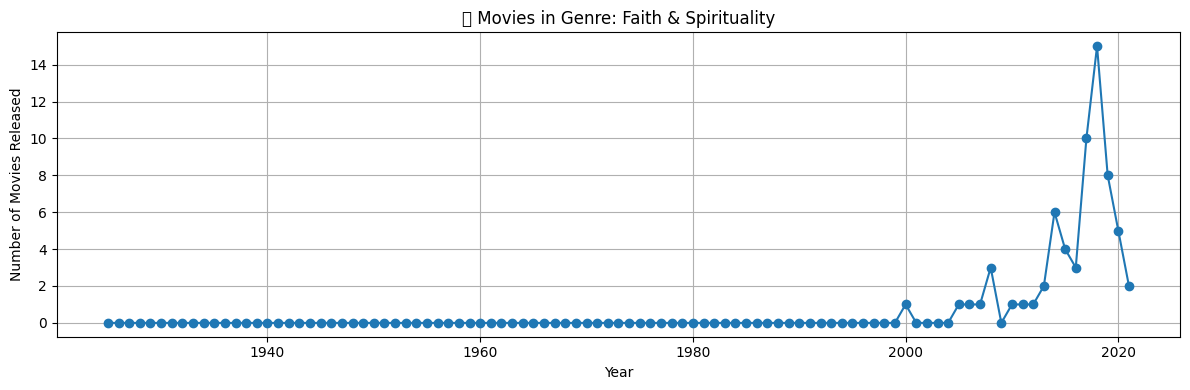

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./data/netflix_titles.csv')

# Filter only Movies
movies = df[df['type'] == 'Movie'].copy()

# Drop rows with missing release year or genres
movies = movies.dropna(subset=['release_year', 'listed_in'])

# Explode genres (split by comma, flatten into multiple rows)
movies['genre'] = movies['listed_in'].str.split(', ')
movies = movies.explode('genre')

# Group by release_year and genre, count occurrences
genre_year_counts = movies.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Sort by year
genre_year_counts = genre_year_counts.sort_values(by='release_year')

# Get all unique genres
unique_genres = genre_year_counts['genre'].unique()

# Generate plots: one per genre
for genre in unique_genres:
    genre_data = genre_year_counts[genre_year_counts['genre'] == genre]

    # Fill missing years with 0 to keep continuity
    all_years = pd.DataFrame({'release_year': range(1925, 2022)})
    genre_data = all_years.merge(genre_data, on='release_year', how='left').fillna({'genre': genre, 'count': 0})

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(genre_data['release_year'], genre_data['count'], marker='o', linestyle='-')
    plt.title(f"🎬 Movies in Genre: {genre}")
    plt.xlabel("Year")
    plt.ylabel("Number of Movies Released")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [22]:
%pwd  # Returns the current working directory

'/media/sina/Sina/Yandex_sync/Academia/sci_codes/python/Kaggle/Netflix_Movies_and_TV_Shows'